In [ ]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Define the path to the Excel file in Google Drive
file_path = '/content/drive/MyDrive/Dataset2Use_Assignment1.xlsx'

# Load the Excel file into a pandas DataFrame
df = pd.read_excel(file_path)

# Display the first 5 rows of the DataFrame to verify loading
display(df.head())

,365* ( Β.Υ / Κοστ.Πωλ ),Λειτ.Αποτ/Συν.Ενεργ. (ROA),ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ,ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ : (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ,(ΑΠΑΙΤ.*365) / ΠΩΛ.,Συν.Υποχρ/Συν.Ενεργ,Διάρκεια Παραμονής Αποθεμάτων,Λογαριθμος Προσωπικού,ΕΝΔΕΙΞΗ ΕΞΑΓΩΓΩΝ,ΕΝΔΕΙΞΗ ΕΙΣΑΓΩΓΩΝ,ΕΝΔΕΙΞΗ ΑΝΤΙΠΡΟΣΩΠΕΙΩΝ,ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1),ΕΤΟΣ
0,1014.128862,0.011751,0.038505,0.965479,567.866550,0.532258,545.195964,0.301030,0,1,0,1,2006
1,561.974631,0.099662,0.015775,1.415467,335.917481,0.660556,7.950910,1.176091,1,1,1,1,2006
2,826.919025,0.009594,0.093562,1.575034,350.618086,0.550912,28.602221,1.204120,0,1,1,1,2006
3,493.176956,0.196284,0.000581,1.346780,414.508709,0.683717,1.216888,1.431364,0,0,0,1,2006
4,100.421465,0.179038,0.000173,3.299687,118.548381,0.254496,52.346321,1.518514,0,1,1,1,2006


In [ ]:
df_grouped = df.groupby(['ΕΤΟΣ', 'ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)']).size().reset_index(name='count')
display(df_grouped.head())

,ΕΤΟΣ,ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1),count
0,2006,1,2748
1,2006,2,52
2,2007,1,2846
3,2007,2,53
4,2008,1,2731


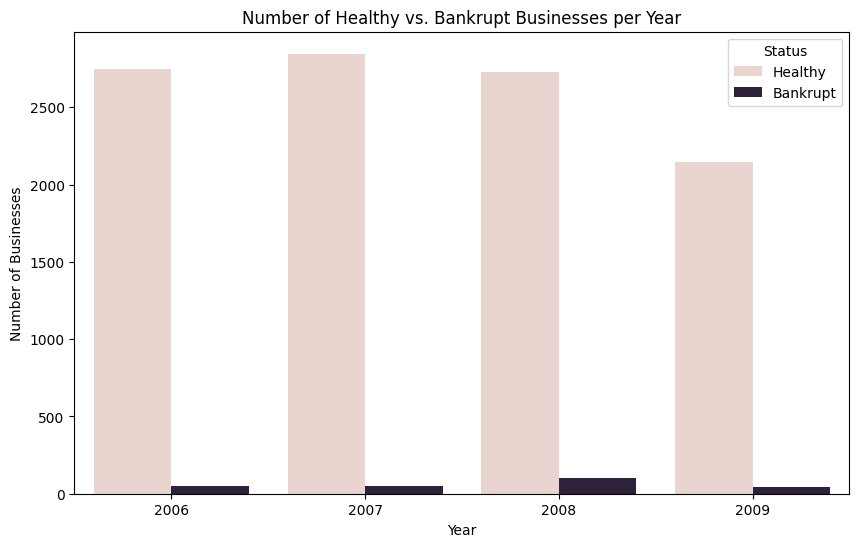

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='ΕΤΟΣ', y='count', hue='ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)', data=df_grouped)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Number of Businesses')
plt.title('Number of Healthy vs. Bankrupt Businesses per Year')

# Customize legend for clarity
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = ['Healthy' if label == '1' else 'Bankrupt' for label in labels]
plt.legend(handles, new_labels, title='Status')

# Display the plot
plt.show()

In [ ]:
df_healthy = df[df['ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)'] == 1]
df_bankrupt = df[df['ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)'] == 2]

print(f"Healthy businesses: {len(df_healthy)} records")
print(f"Bankrupt businesses: {len(df_bankrupt)} records")

Healthy businesses: 10468 records
Bankrupt businesses: 248 records


In [ ]:
excluded_cols = ['ΕΤΟΣ', 'ΕΝΔΕΙΞΗ ΕΞΑΓΩΓΩΝ', 'ΕΝΔΕΙΞΗ ΕΙΣΑΓΩΓΩΝ', 'ΕΝΔΕΙΞΗ ΑΝΤΙΠΡΟΣΩΠΕΙΩΝ', 'ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)']
indicator_cols = [col for col in df.columns if col not in excluded_cols]

print("Excluded columns:", excluded_cols)
print("Indicator columns for statistical calculation:", indicator_cols)

Excluded columns: ['ΕΤΟΣ', 'ΕΝΔΕΙΞΗ ΕΞΑΓΩΓΩΝ', 'ΕΝΔΕΙΞΗ ΕΙΣΑΓΩΓΩΝ', 'ΕΝΔΕΙΞΗ ΑΝΤΙΠΡΟΣΩΠΕΙΩΝ', 'ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)']
Indicator columns for statistical calculation: ['365* ( Β.Υ / Κοστ.Πωλ )', 'Λειτ.Αποτ/Συν.Ενεργ. (ROA)', 'ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ', ' ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ :  (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ', '(ΑΠΑΙΤ.*365) / ΠΩΛ.', 'Συν.Υποχρ/Συν.Ενεργ', 'Διάρκεια Παραμονής Αποθεμάτων', 'Λογαριθμος Προσωπικού']


In [ ]:
healthy_stats = df_healthy[indicator_cols].agg(['min', 'max', 'mean']).transpose()
bankrupt_stats = df_bankrupt[indicator_cols].agg(['min', 'max', 'mean']).transpose()

print("Statistics for Healthy Businesses:")
display(healthy_stats)

print("\nStatistics for Bankrupt Businesses:")
display(bankrupt_stats)

Statistics for Healthy Businesses:


,min,max,mean
365* ( Β.Υ / Κοστ.Πωλ ),0.654350,1500.000000,441.648877
Λειτ.Αποτ/Συν.Ενεργ. (ROA),-0.600000,0.500000,0.039294
ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ,0.000000,0.200000,0.028148
ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ : (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ,0.000661,5.000000,1.149169
(ΑΠΑΙΤ.*365) / ΠΩΛ.,0.000000,1200.000000,211.906358
Συν.Υποχρ/Συν.Ενεργ,0.000412,1.670000,0.741319
Διάρκεια Παραμονής Αποθεμάτων,0.000000,1332.105492,107.062963
Λογαριθμος Προσωπικού,0.000000,2.929930,1.031274



Statistics for Bankrupt Businesses:


,min,max,mean
365* ( Β.Υ / Κοστ.Πωλ ),17.374899,1500.000000,646.921590
Λειτ.Αποτ/Συν.Ενεργ. (ROA),-0.600000,0.470065,-0.038892
ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ,0.000000,0.200000,0.061917
ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ : (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ,0.008819,5.000000,0.850250
(ΑΠΑΙΤ.*365) / ΠΩΛ.,0.000000,1200.000000,278.521196
Συν.Υποχρ/Συν.Ενεργ,0.049999,1.670000,0.860418
Διάρκεια Παραμονής Αποθεμάτων,0.000000,1290.425440,183.978567
Λογαριθμος Προσωπικού,0.000000,1.880814,0.585120


In [ ]:
healthy_stats_reset = healthy_stats.reset_index()
healthy_stats_reset = healthy_stats_reset.rename(columns={'index': 'Indicator'})

healthy_stats_melted = healthy_stats_reset.melt(id_vars='Indicator', var_name='Statistic Type', value_name='Value')

print("Melted Healthy Stats (first 5 rows):")
display(healthy_stats_melted.head())

Melted Healthy Stats (first 5 rows):


,Indicator,Statistic Type,Value
0,365* ( Β.Υ / Κοστ.Πωλ ),min,0.654350
1,Λειτ.Αποτ/Συν.Ενεργ. (ROA),min,-0.600000
2,ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ,min,0.000000
3,ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ : (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ,min,0.000661
4,(ΑΠΑΙΤ.*365) / ΠΩΛ.,min,0.000000


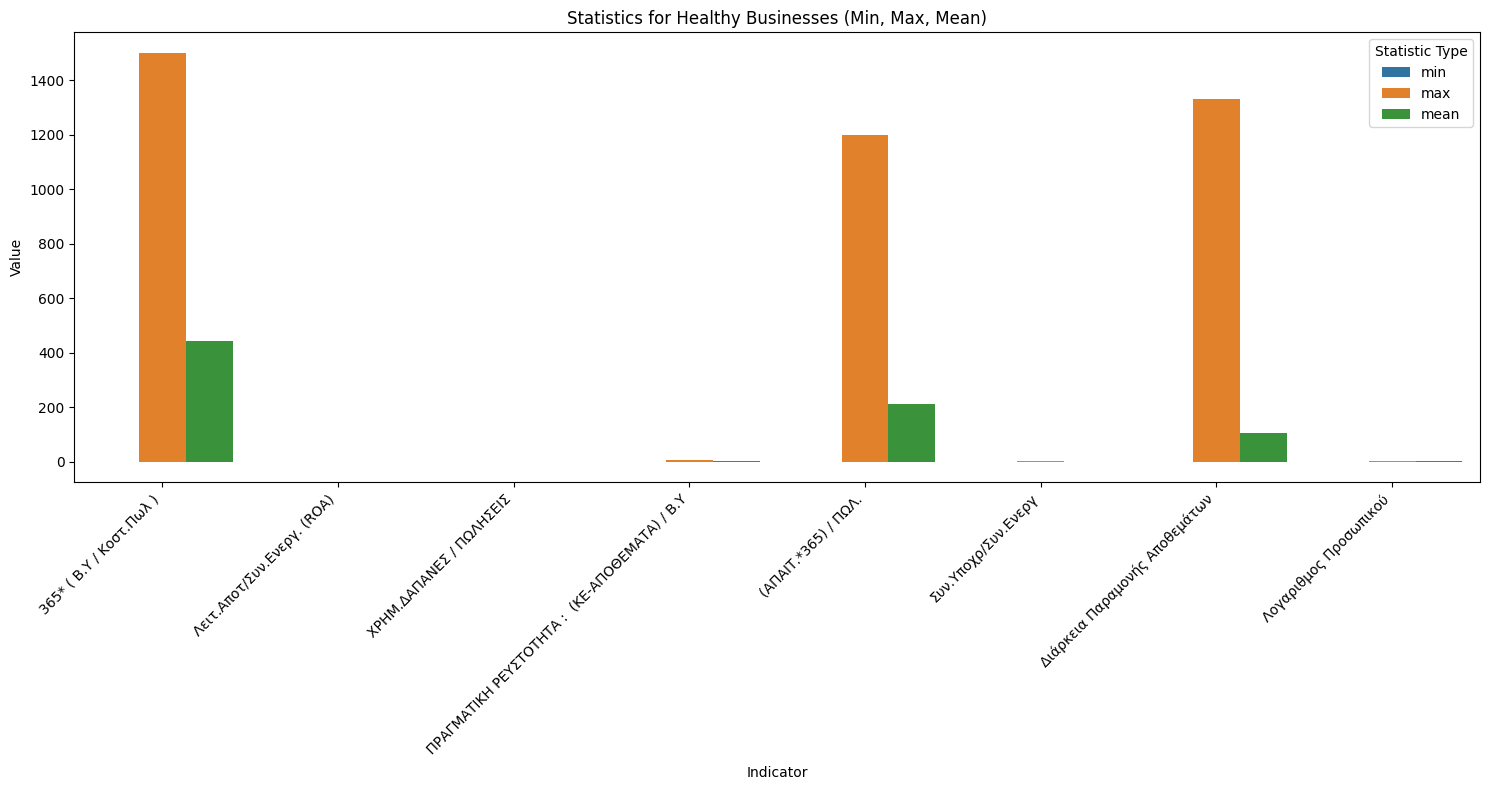

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.barplot(x='Indicator', y='Value', hue='Statistic Type', data=healthy_stats_melted)

plt.xlabel('Indicator')
plt.ylabel('Value')
plt.title('Statistics for Healthy Businesses (Min, Max, Mean)')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
plt.legend(title='Statistic Type')
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


In [ ]:
bankrupt_stats_reset = bankrupt_stats.reset_index()
bankrupt_stats_reset = bankrupt_stats_reset.rename(columns={'index': 'Indicator'})

bankrupt_stats_melted = bankrupt_stats_reset.melt(id_vars='Indicator', var_name='Statistic Type', value_name='Value')

print("Melted Bankrupt Stats (first 5 rows):")
display(bankrupt_stats_melted.head())

Melted Bankrupt Stats (first 5 rows):


,Indicator,Statistic Type,Value
0,365* ( Β.Υ / Κοστ.Πωλ ),min,17.374899
1,Λειτ.Αποτ/Συν.Ενεργ. (ROA),min,-0.600000
2,ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ,min,0.000000
3,ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ : (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ,min,0.008819
4,(ΑΠΑΙΤ.*365) / ΠΩΛ.,min,0.000000


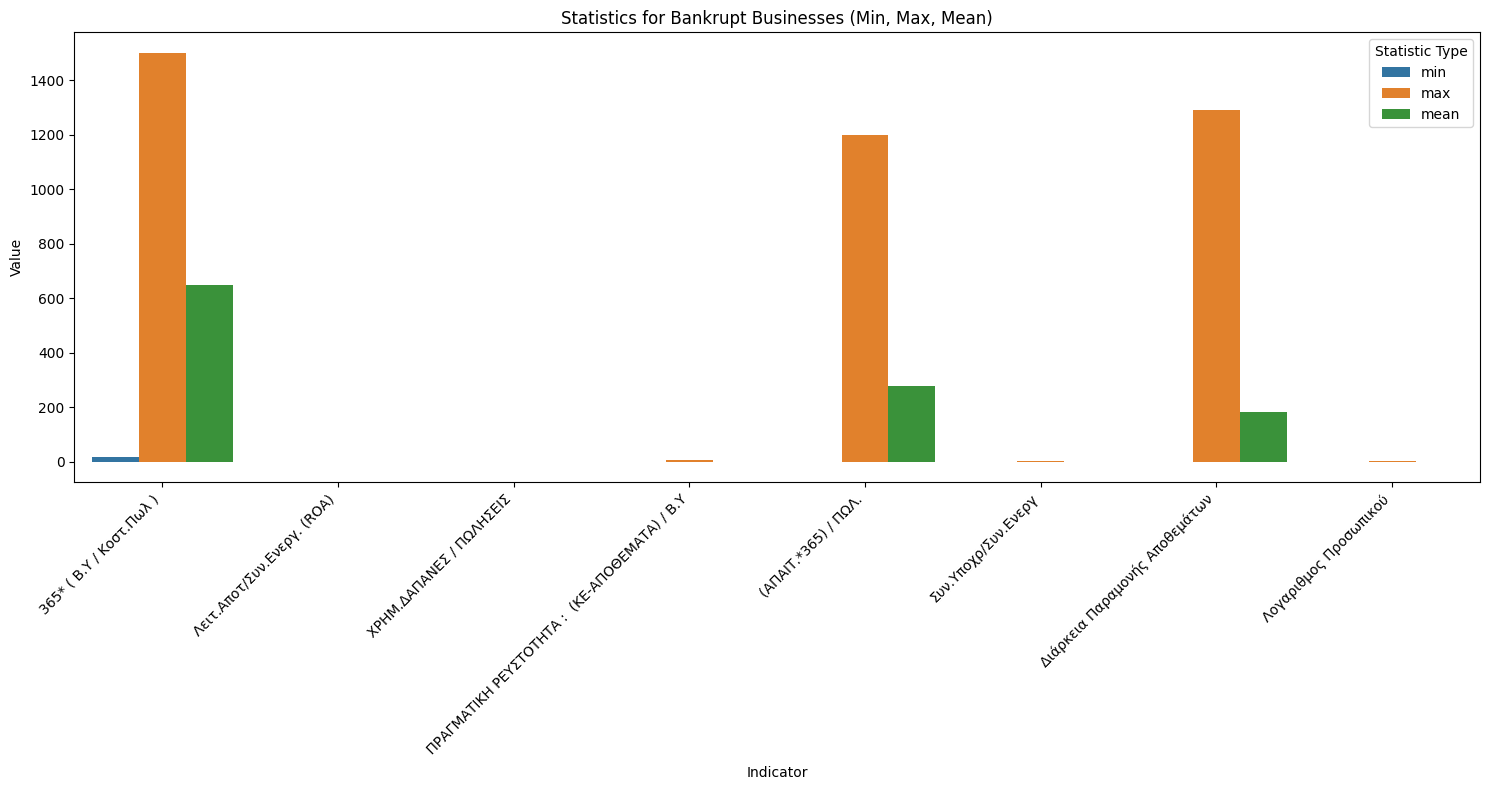

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.barplot(x='Indicator', y='Value', hue='Statistic Type', data=bankrupt_stats_melted)

plt.xlabel('Indicator')
plt.ylabel('Value')
plt.title('Statistics for Bankrupt Businesses (Min, Max, Mean)')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
plt.legend(title='Statistic Type')
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
# Check for missing values in the DataFrame
missing_values = df.isnull().sum()

# Filter to show only columns with missing values
missing_values = missing_values[missing_values > 0]

# Check if there are any missing values
if not missing_values.empty:
    print("Detected missing values (NaNs) in the following columns:")
    display(missing_values)
    print(f"Total missing values across the DataFrame: {missing_values.sum()}")
else:
    print("No missing values (NaNs) detected in the DataFrame.")

No missing values (NaNs) detected in the DataFrame.


In [ ]:
# Create a copy of the DataFrame to store normalized data
df_normalized = df.copy()

# Loop through each indicator column and apply Min-Max Normalization
for col in indicator_cols:
    min_val = df_normalized[col].min()
    max_val = df_normalized[col].max()
    # Apply the min-max scaling formula: (x - min(x)) / (max(x) - min(x))
    # Handle cases where max_val - min_val is zero to avoid division by zero
    if (max_val - min_val) != 0:
        df_normalized[col] = (df_normalized[col] - min_val) / (max_val - min_val)
    else:
        # If all values are the same, set them to 0 (or 1, depending on desired behavior)
        df_normalized[col] = 0.0 # Or 1.0, to indicate a single, constant value

# Display the first 5 rows of the normalized DataFrame to verify the transformation
print("First 5 rows of the normalized DataFrame:")
display(df_normalized.head())

First 5 rows of the normalized DataFrame:


,365* ( Β.Υ / Κοστ.Πωλ ),Λειτ.Αποτ/Συν.Ενεργ. (ROA),ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ,ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ : (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ,(ΑΠΑΙΤ.*365) / ΠΩΛ.,Συν.Υποχρ/Συν.Ενεργ,Διάρκεια Παραμονής Αποθεμάτων,Λογαριθμος Προσωπικού,ΕΝΔΕΙΞΗ ΕΞΑΓΩΓΩΝ,ΕΝΔΕΙΞΗ ΕΙΣΑΓΩΓΩΝ,ΕΝΔΕΙΞΗ ΑΝΤΙΠΡΟΣΩΠΕΙΩΝ,ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1),ΕΤΟΣ
0,0.675945,0.556137,0.192526,0.192989,0.473222,0.318549,0.409274,0.102743,0,1,0,1,2006
1,0.374377,0.636057,0.078877,0.282999,0.279931,0.395393,0.005969,0.401406,1,1,1,1,2006
2,0.551084,0.554176,0.467810,0.314916,0.292182,0.329722,0.021471,0.410972,0,1,1,1,2006
3,0.328492,0.723895,0.002904,0.269259,0.345424,0.409265,0.000914,0.488532,0,0,0,1,2006
4,0.066540,0.708216,0.000866,0.659892,0.098790,0.152183,0.039296,0.518277,0,1,1,1,2006


In [ ]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Define features (X) and target (y) for stratification
# The target variable is 'ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)' (Bankruptcy Indicator)
y = df_normalized['ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)']
X = df_normalized.drop('ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)', axis=1)

# Exclude other non-indicator columns from X if they haven't been excluded already
# We already have 'indicator_cols' which are the numerical columns we want to keep.
# We also need to drop 'ΕΤΟΣ' (Year) if it's still in X and not an indicator.
# Check if 'ΕΤΟΣ' exists in X and remove it if it's not part of indicator_cols
if 'ΕΤΟΣ' in X.columns:
    X = X.drop('ΕΤΟΣ', axis=1)

# Initialize StratifiedKFold with 4 splits
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

print(f"Applying Stratified K-Fold with {skf.get_n_splits()} splits...")

# Iterate through the folds and print information about each split
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print(f"\nFold {fold + 1}:")
    # Print absolute counts for training set
    print(f"  Training set size: {len(X_train)} samples, Target counts (Healthy=1, Bankrupt=2):\n{y_train.value_counts()}")
    # Print absolute counts for testing set
    print(f"  Testing set size: {len(X_test)} samples, Target counts (Healthy=1, Bankrupt=2):\n{y_test.value_counts()}")

Applying Stratified K-Fold with 4 splits...

Fold 1:
  Training set size: 8037 samples, Target counts (Healthy=1, Bankrupt=2):
ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)
1    7851
2     186
Name: count, dtype: int64
  Testing set size: 2679 samples, Target counts (Healthy=1, Bankrupt=2):
ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)
1    2617
2      62
Name: count, dtype: int64

Fold 2:
  Training set size: 8037 samples, Target counts (Healthy=1, Bankrupt=2):
ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)
1    7851
2     186
Name: count, dtype: int64
  Testing set size: 2679 samples, Target counts (Healthy=1, Bankrupt=2):
ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)
1    2617
2      62
Name: count, dtype: int64

Fold 3:
  Training set size: 8037 samples, Target counts (Healthy=1, Bankrupt=2):
ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)
1    7851
2     186
Name: count, dtype: int64
  Testing set size: 2679 samples, Target counts (Healthy=1, Bankrupt=2):
ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)
1    2617
2      62
Name: count, dtype: int64

Fold 4:
  Training set size: 80

In [ ]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Initialize StratifiedKFold with 4 splits (same as before)
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

# Store balanced train/test sets if needed for later steps
balanced_folds = []

print("Balancing training sets to achieve a 3:1 (Healthy:Bankrupt) ratio if current ratio is higher...")

# Iterate through the folds
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Get counts for healthy and bankrupt businesses in the training set
    healthy_train_indices = y_train[y_train == 1].index
    bankrupt_train_indices = y_train[y_train == 2].index

    num_healthy_train = len(healthy_train_indices)
    num_bankrupt_train = len(bankrupt_train_indices)

    print(f"\nFold {fold + 1}:")
    print(f"  Original Training Set - Healthy: {num_healthy_train}, Bankrupt: {num_bankrupt_train}")

    # Check if balancing is needed (more than 3 healthy for every 1 bankrupt)
    if num_healthy_train / num_bankrupt_train > 3:
        # Calculate the target number of healthy businesses for a 3:1 ratio
        target_healthy_count = num_bankrupt_train * 3

        # Randomly select 'target_healthy_count' healthy businesses
        np.random.seed(42) # For reproducibility
        downsampled_healthy_indices = np.random.choice(healthy_train_indices, size=target_healthy_count, replace=False)

        # Combine downsampled healthy indices with all bankrupt indices
        balanced_train_indices = np.concatenate([downsampled_healthy_indices, bankrupt_train_indices])

        # Create the balanced training sets
        X_train_balanced = X.loc[balanced_train_indices]
        y_train_balanced = y.loc[balanced_train_indices]

        print(f"  Balanced Training Set - Healthy: {len(y_train_balanced[y_train_balanced == 1])}, Bankrupt: {len(y_train_balanced[y_train_balanced == 2])}")
    else:
        # If no balancing is needed, use the original training sets
        X_train_balanced = X_train
        y_train_balanced = y_train
        print("  No balancing applied (ratio is already <= 3:1).")

    # Store the balanced fold data (X_train_balanced, y_train_balanced, X_test, y_test)
    # This is useful if you plan to use these folds for model training later
    balanced_folds.append({
        'X_train': X_train_balanced,
        'y_train': y_train_balanced,
        'X_test': X_test,
        'y_test': y_test
    })

print("\nBalancing complete. The balanced training sets are stored in the 'balanced_folds' list.")


Balancing training sets to achieve a 3:1 (Healthy:Bankrupt) ratio if current ratio is higher...

Fold 1:
  Original Training Set - Healthy: 7851, Bankrupt: 186
  Balanced Training Set - Healthy: 558, Bankrupt: 186

Fold 2:
  Original Training Set - Healthy: 7851, Bankrupt: 186
  Balanced Training Set - Healthy: 558, Bankrupt: 186

Fold 3:
  Original Training Set - Healthy: 7851, Bankrupt: 186
  Balanced Training Set - Healthy: 558, Bankrupt: 186

Fold 4:
  Original Training Set - Healthy: 7851, Bankrupt: 186
  Balanced Training Set - Healthy: 558, Bankrupt: 186

Balancing complete. The balanced training sets are stored in the 'balanced_folds' list.


In [ ]:
print("Displaying train/test distributions after balancing training sets:")

for fold_num, fold_data in enumerate(balanced_folds):
    y_train_balanced = fold_data['y_train']
    y_test = fold_data['y_test']

    print(f"\nFold {fold_num + 1}:")
    # Print absolute counts for balanced training set
    print(f"  Balanced Training set size: {len(y_train_balanced)} samples, Target counts (Healthy=1, Bankrupt=2):\n{y_train_balanced.value_counts()}")
    # Print absolute counts for original testing set (unmodified)
    print(f"  Testing set size: {len(y_test)} samples, Target counts (Healthy=1, Bankrupt=2):\n{y_test.value_counts()}")

Displaying train/test distributions after balancing training sets:

Fold 1:
  Balanced Training set size: 744 samples, Target counts (Healthy=1, Bankrupt=2):
ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)
1    558
2    186
Name: count, dtype: int64
  Testing set size: 2679 samples, Target counts (Healthy=1, Bankrupt=2):
ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)
1    2617
2      62
Name: count, dtype: int64

Fold 2:
  Balanced Training set size: 744 samples, Target counts (Healthy=1, Bankrupt=2):
ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)
1    558
2    186
Name: count, dtype: int64
  Testing set size: 2679 samples, Target counts (Healthy=1, Bankrupt=2):
ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)
1    2617
2      62
Name: count, dtype: int64

Fold 3:
  Balanced Training set size: 744 samples, Target counts (Healthy=1, Bankrupt=2):
ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)
1    558
2    186
Name: count, dtype: int64
  Testing set size: 2679 samples, Target counts (Healthy=1, Bankrupt=2):
ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)
1    2617
2      62
Name: count, dtyp

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Initialize classifiers with random_state=42 where applicable
models = {
    'LDA': LinearDiscriminantAnalysis(),
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear'), # solver='liblinear' added to suppress warning
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(random_state=42, probability=True), # probability=True for future use with predict_proba
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

print("Initialized the following models:")
for name, model in models.items():
    print(f"- {name}: {model}")

Initialized the following models:
- LDA: LinearDiscriminantAnalysis()
- Logistic Regression: LogisticRegression(random_state=42, solver='liblinear')
- Decision Tree: DecisionTreeClassifier(random_state=42)
- Random Forest: RandomForestClassifier(random_state=42)
- K-Nearest Neighbors: KNeighborsClassifier()
- Gaussian Naive Bayes: GaussianNB()
- Support Vector Machine: SVC(probability=True, random_state=42)
- Gradient Boosting: GradientBoostingClassifier(random_state=42)


In [ ]:
trained_models_per_fold = {}

print("Starting model training across balanced folds...")

for fold_num, fold_data in enumerate(balanced_folds):
    X_train_balanced = fold_data['X_train']
    y_train_balanced = fold_data['y_train']

    fold_trained_models = {}
    print(f"\n--- Training models for Fold {fold_num + 1} ---")

    for model_name, model_instance in models.items():
        print(f"  Training {model_name}...")
        # Train the model
        model_instance.fit(X_train_balanced, y_train_balanced)
        # Store the trained model
        fold_trained_models[model_name] = model_instance

    # Store all trained models for the current fold
    trained_models_per_fold[f'Fold_{fold_num + 1}'] = fold_trained_models
    print(f"  All models for Fold {fold_num + 1} trained successfully.")

print("\nModel training complete for all folds.")
print("Trained models are stored in 'trained_models_per_fold' dictionary.")

Starting model training across balanced folds...

--- Training models for Fold 1 ---
  Training LDA...
  Training Logistic Regression...
  Training Decision Tree...
  Training Random Forest...
  Training K-Nearest Neighbors...
  Training Gaussian Naive Bayes...
  Training Support Vector Machine...
  Training Gradient Boosting...
  All models for Fold 1 trained successfully.

--- Training models for Fold 2 ---
  Training LDA...
  Training Logistic Regression...
  Training Decision Tree...
  Training Random Forest...
  Training K-Nearest Neighbors...
  Training Gaussian Naive Bayes...
  Training Support Vector Machine...
  Training Gradient Boosting...
  All models for Fold 2 trained successfully.

--- Training models for Fold 3 ---
  Training LDA...
  Training Logistic Regression...
  Training Decision Tree...
  Training Random Forest...
  Training K-Nearest Neighbors...
  Training Gaussian Naive Bayes...
  Training Support Vector Machine...
  Training Gradient Boosting...
  All models 

Generating Confusion Matrices for all trained models across all folds...

--- Confusion Matrices for Fold_1 ---


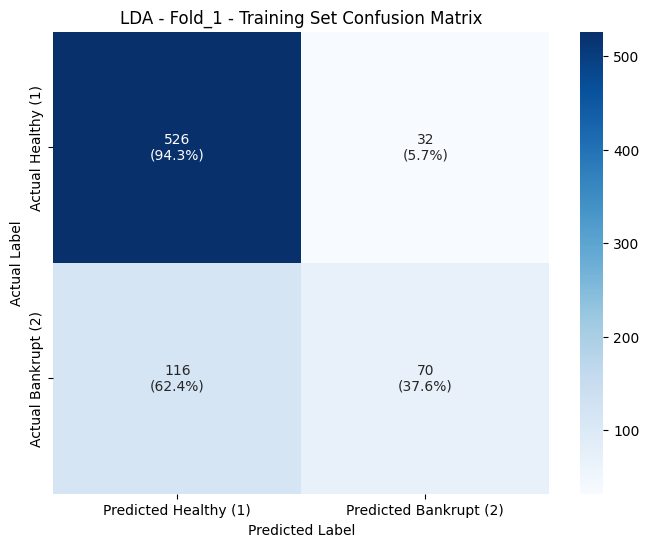

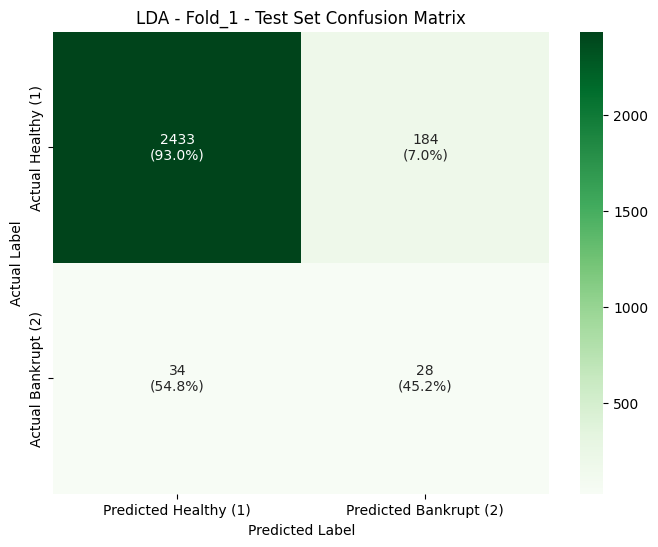

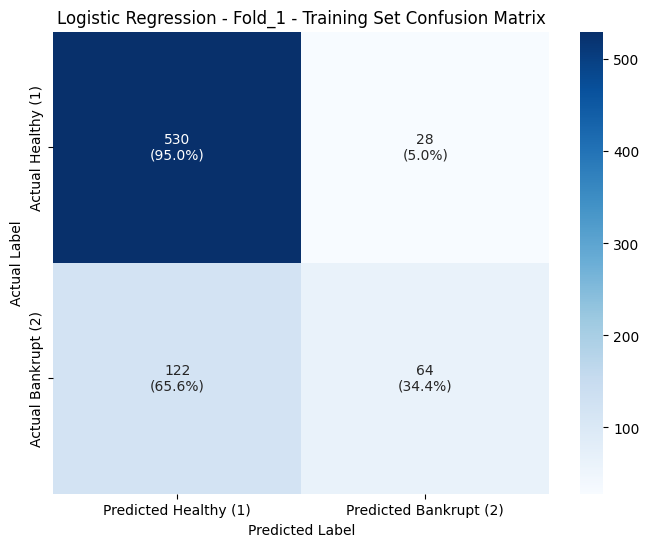

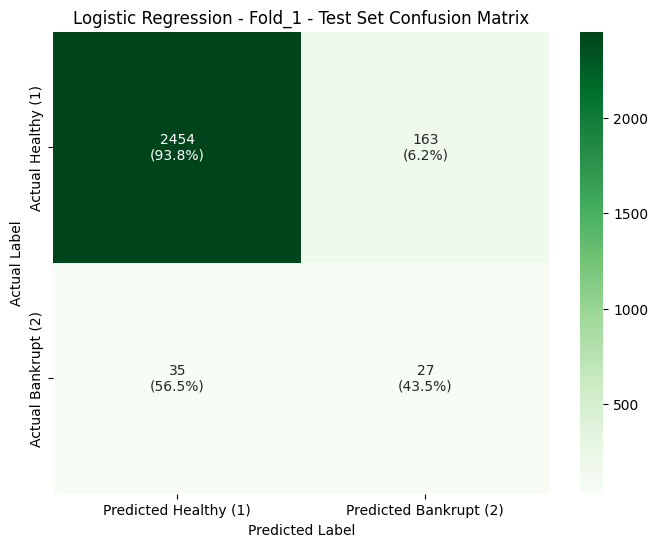

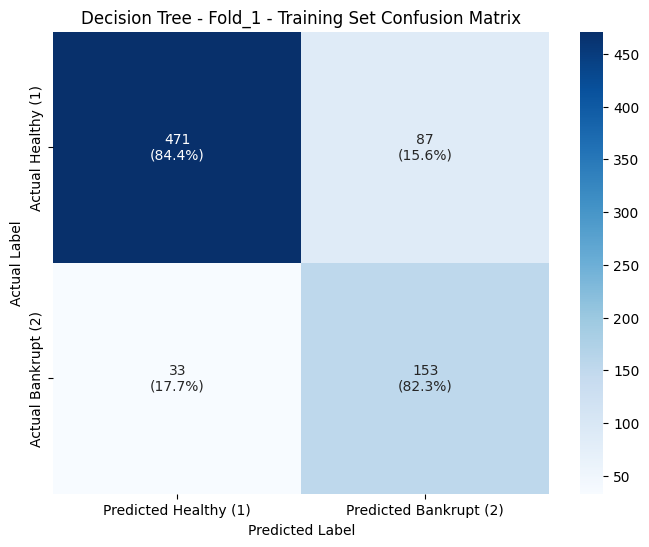

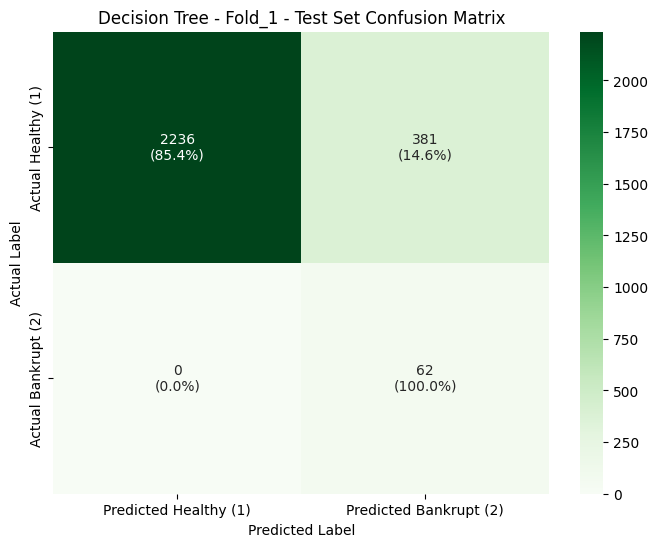

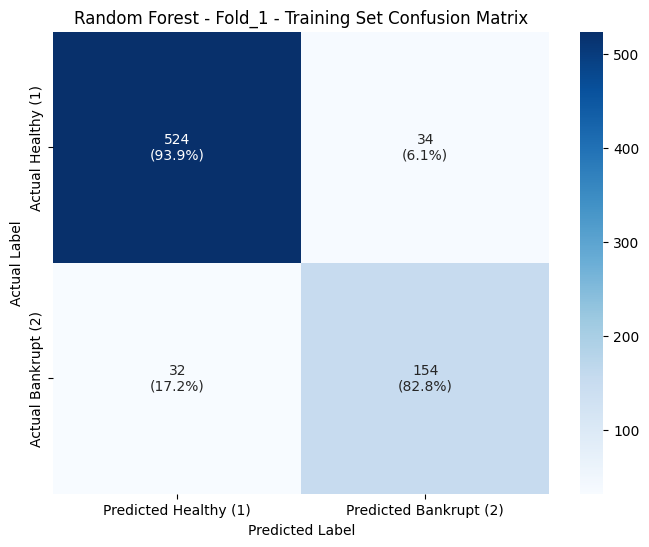

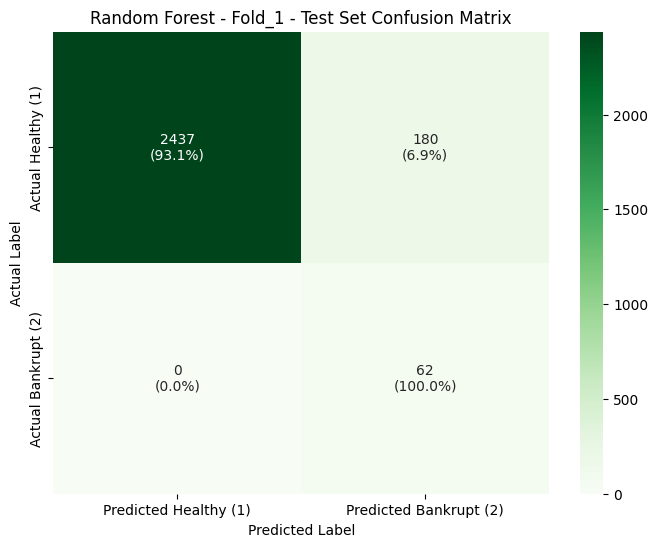

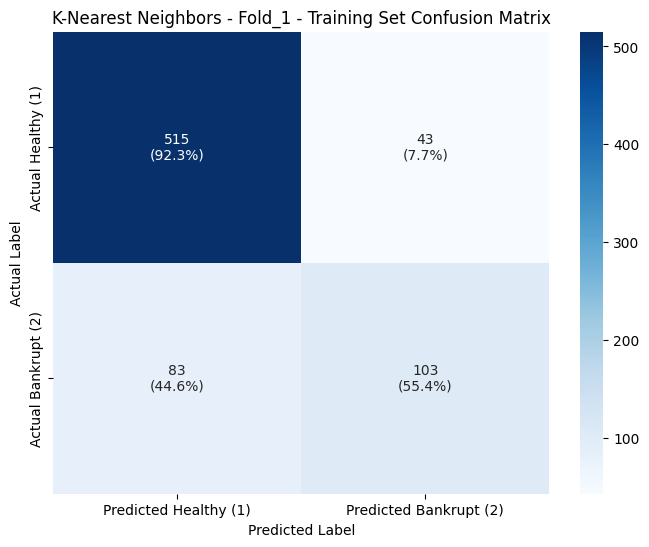

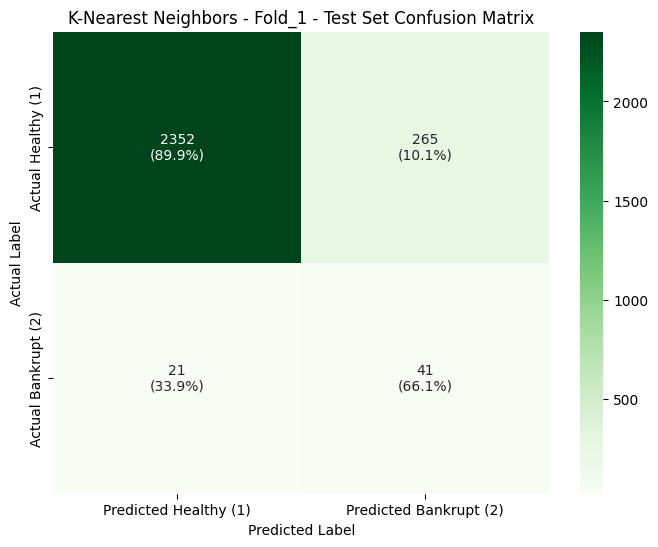

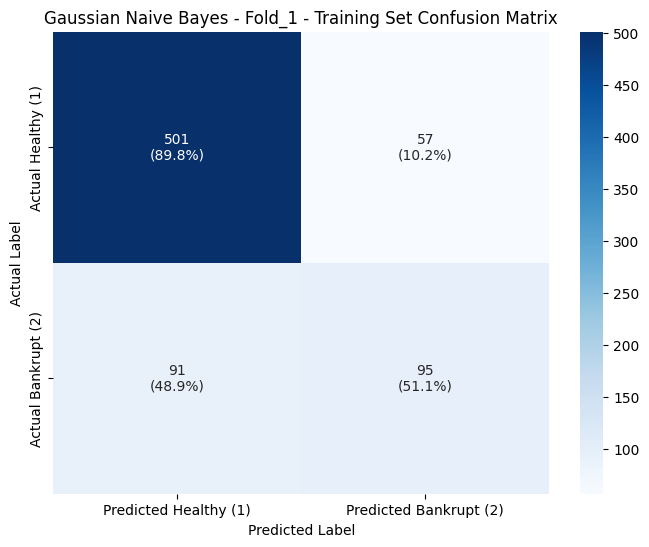

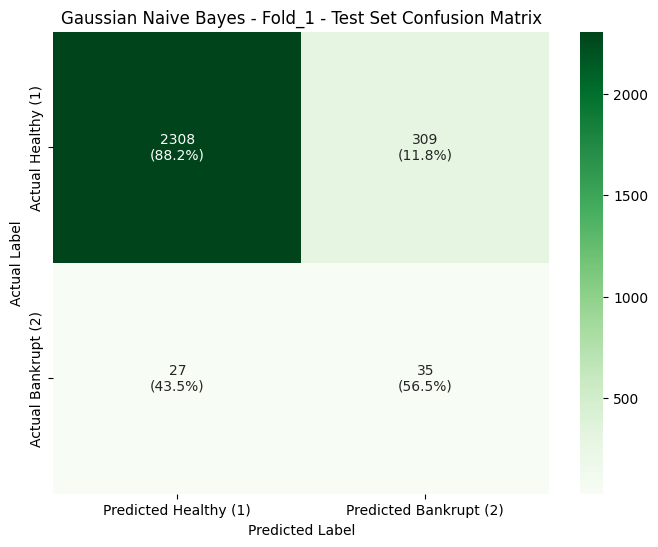

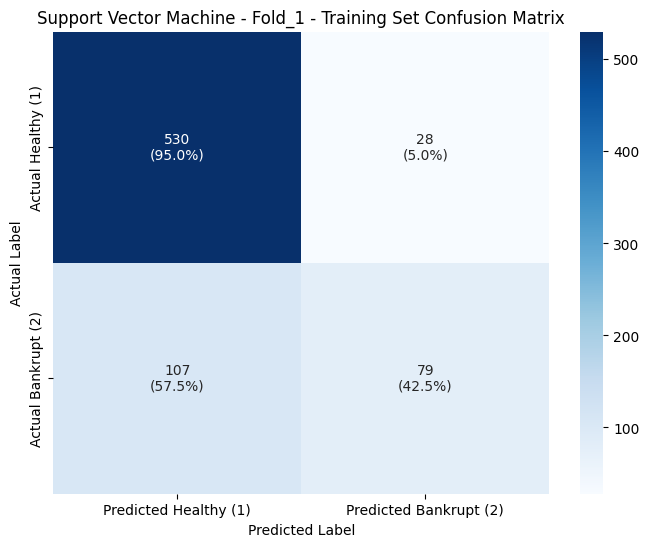

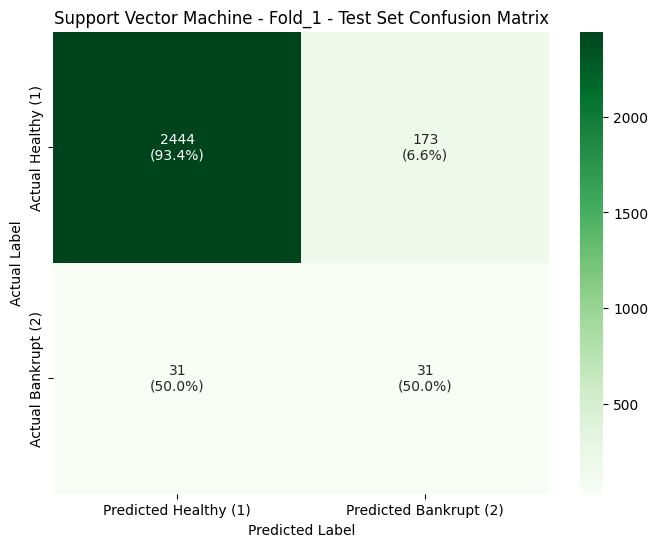

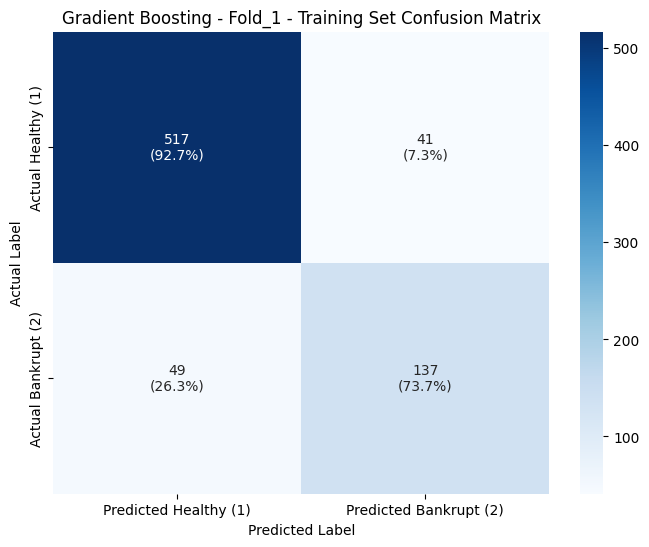

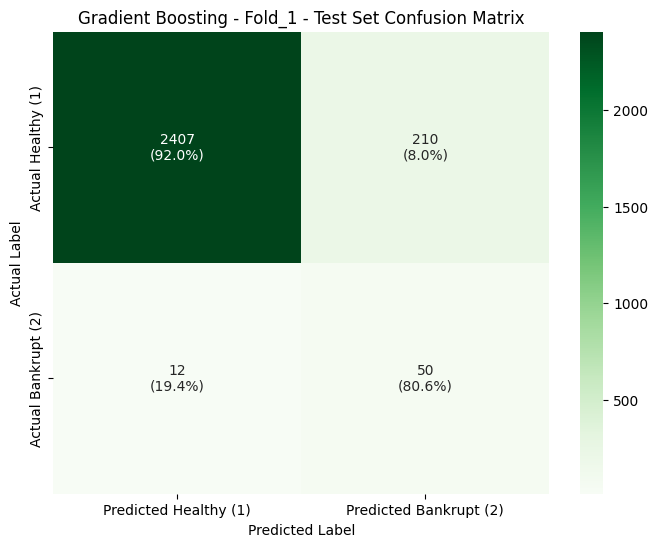


--- Confusion Matrices for Fold_2 ---


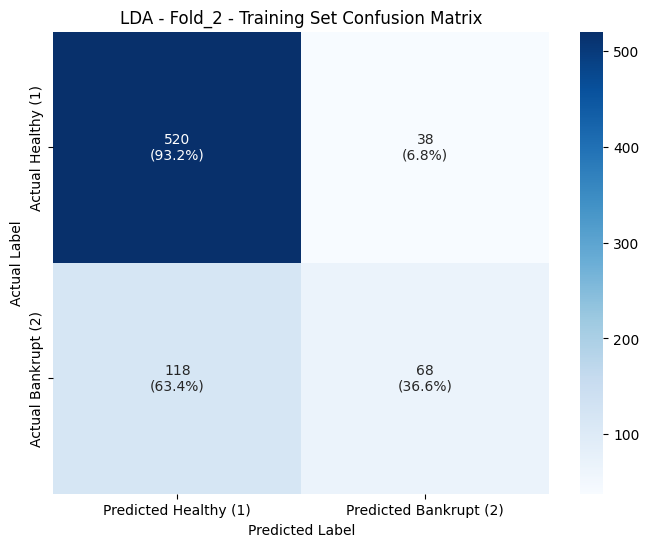

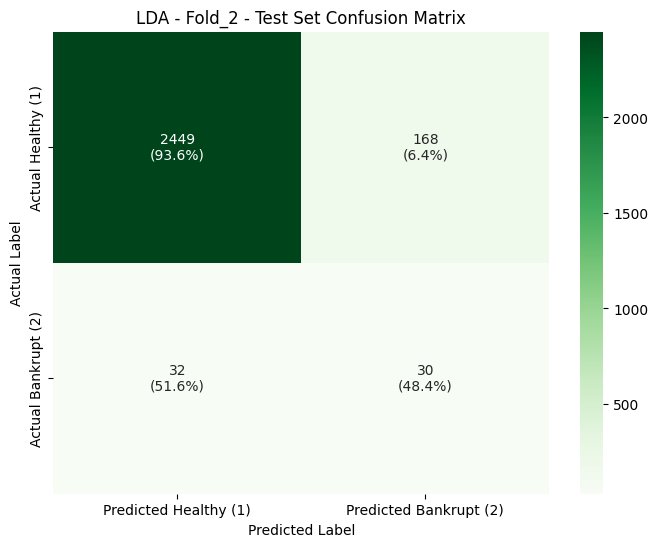

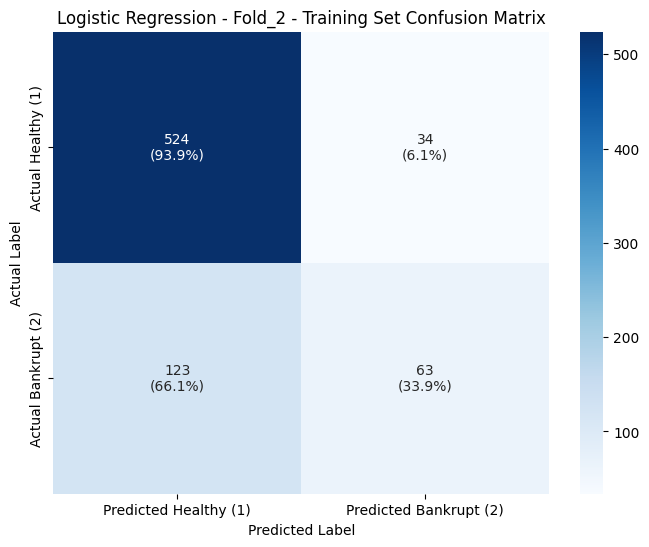

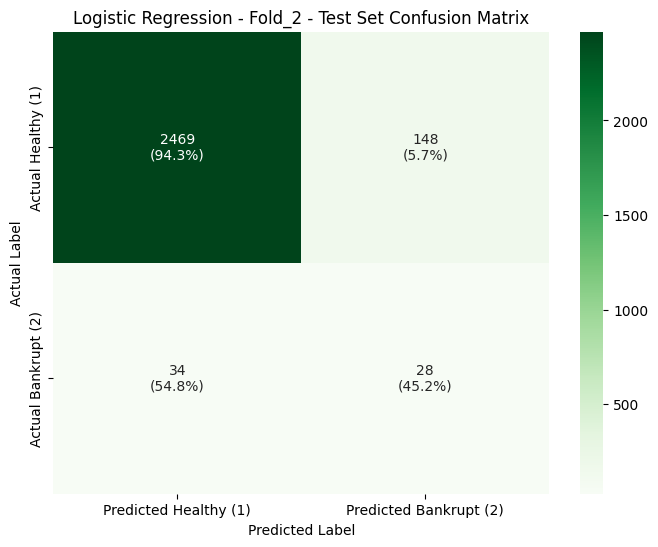

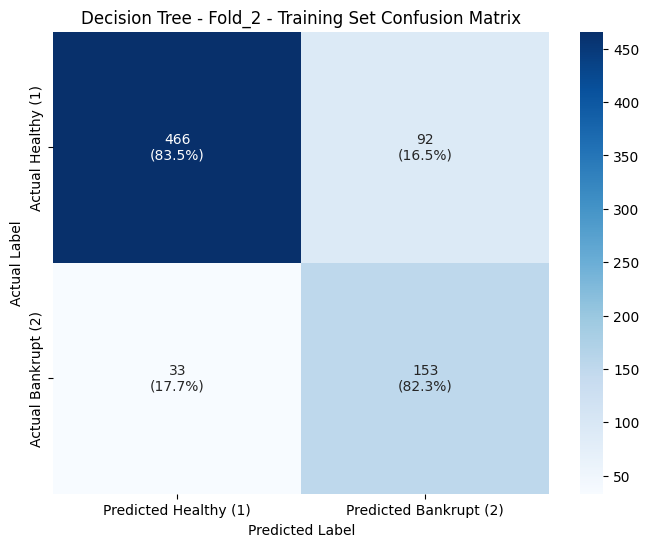

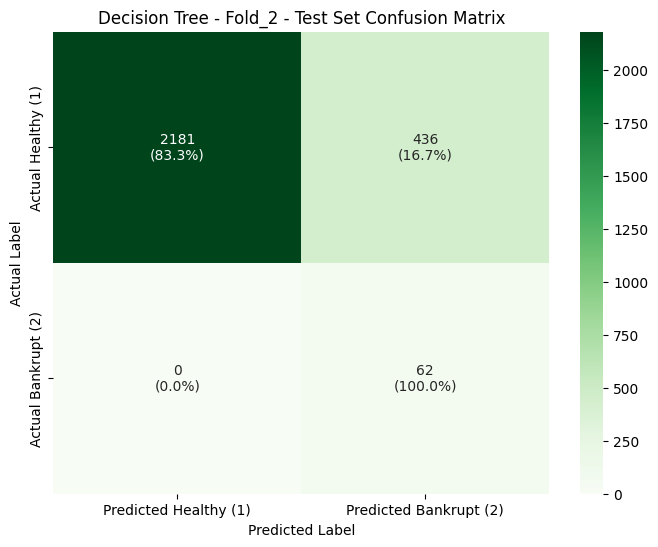

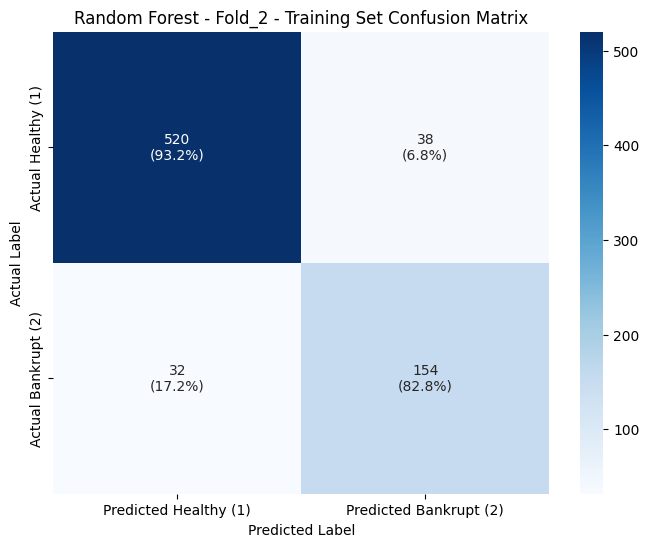

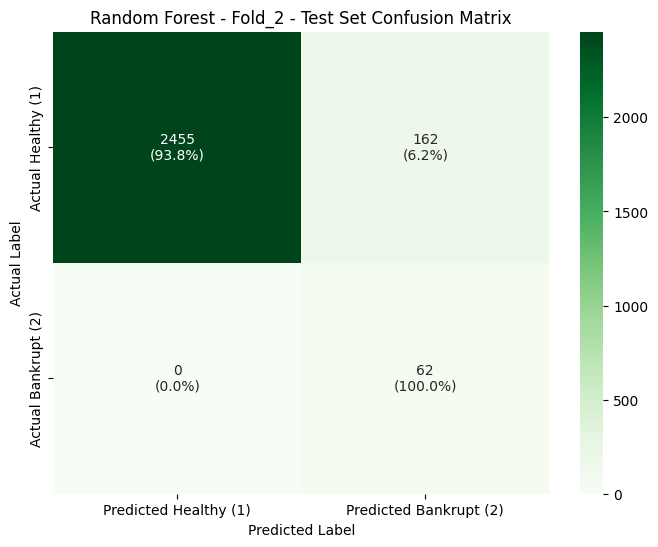

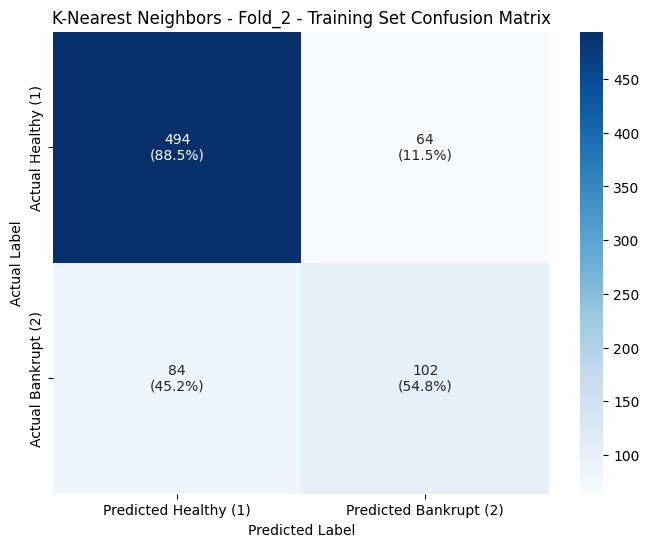

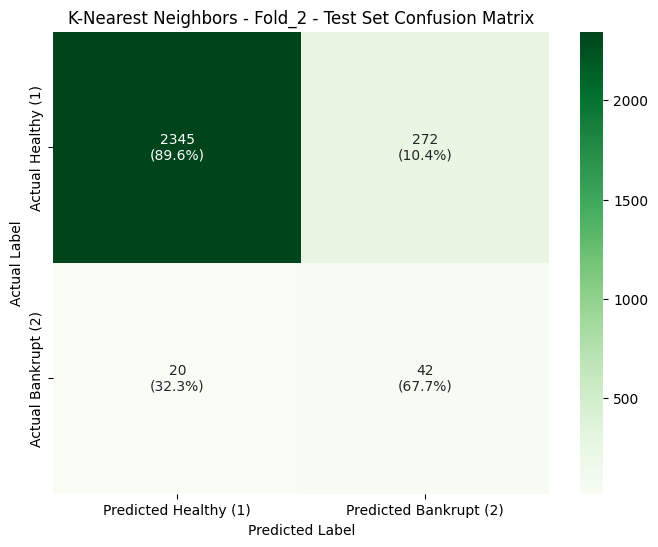

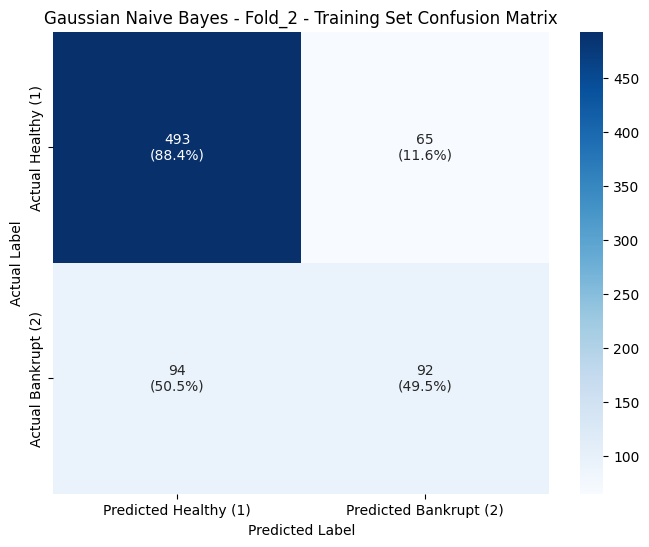

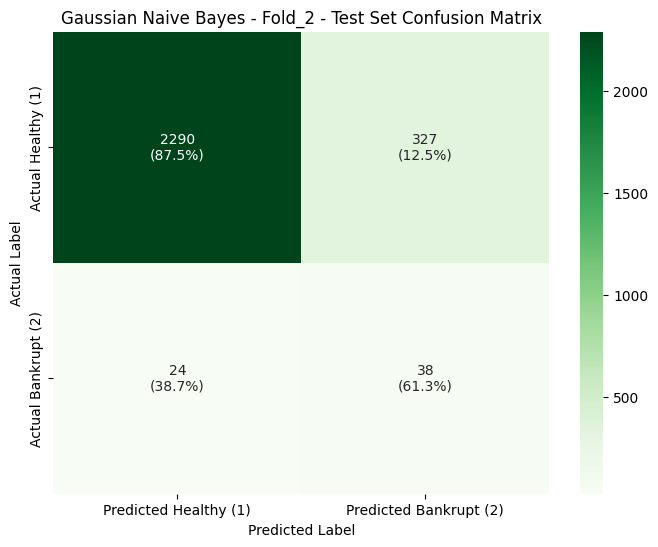

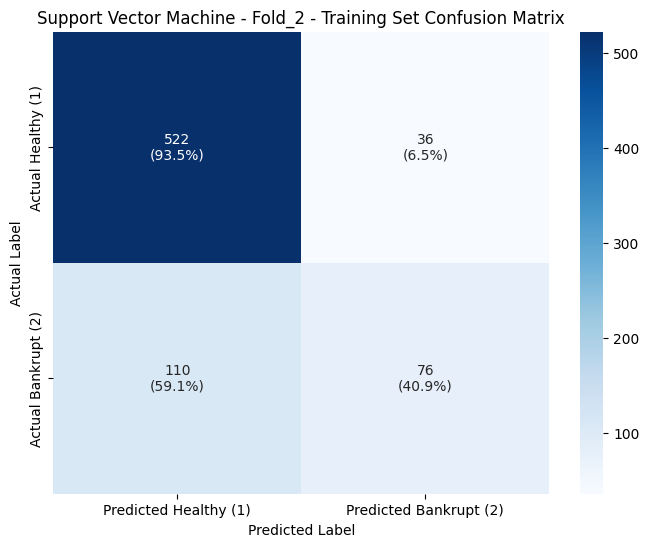

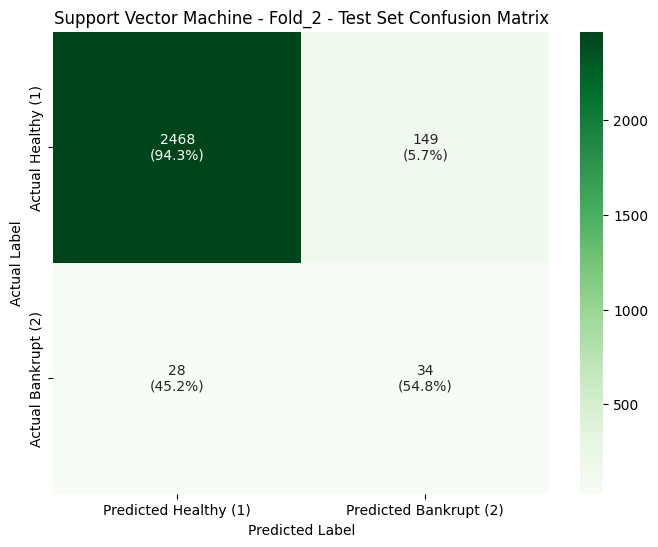

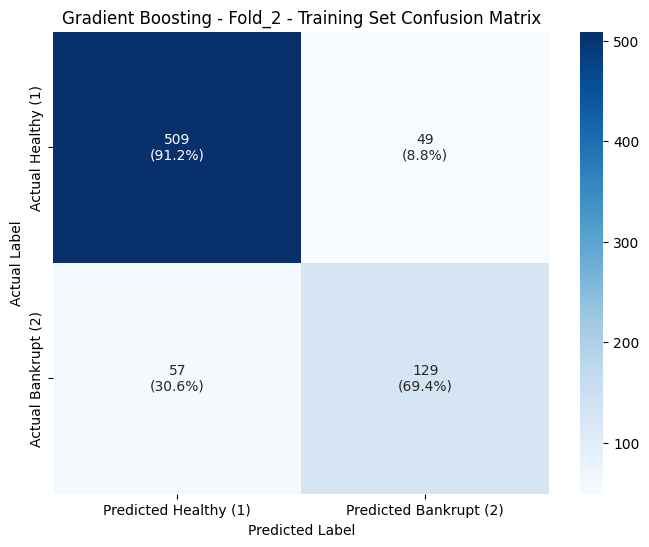

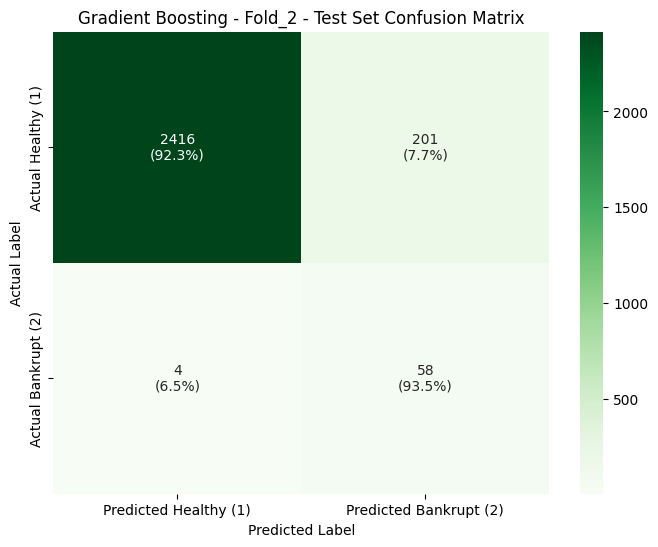


--- Confusion Matrices for Fold_3 ---


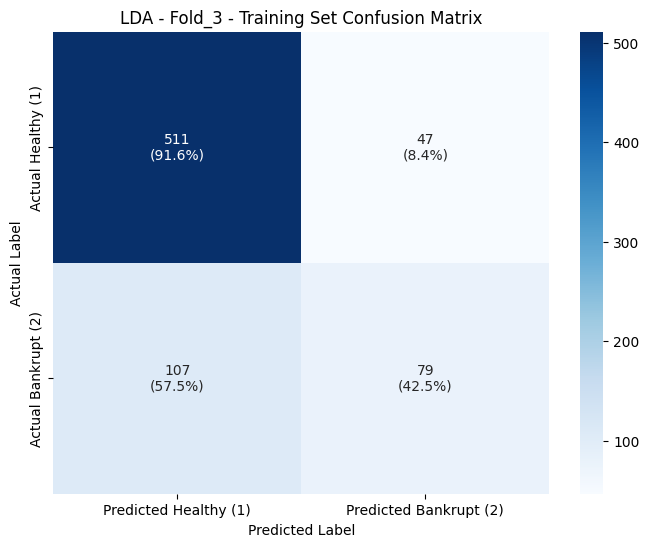

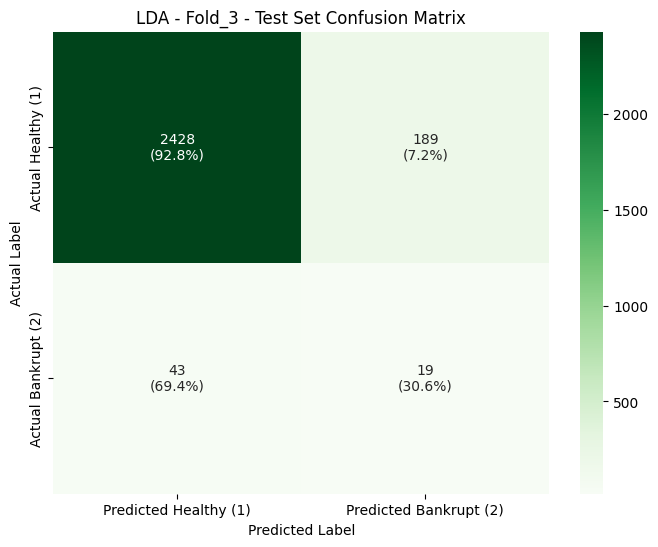

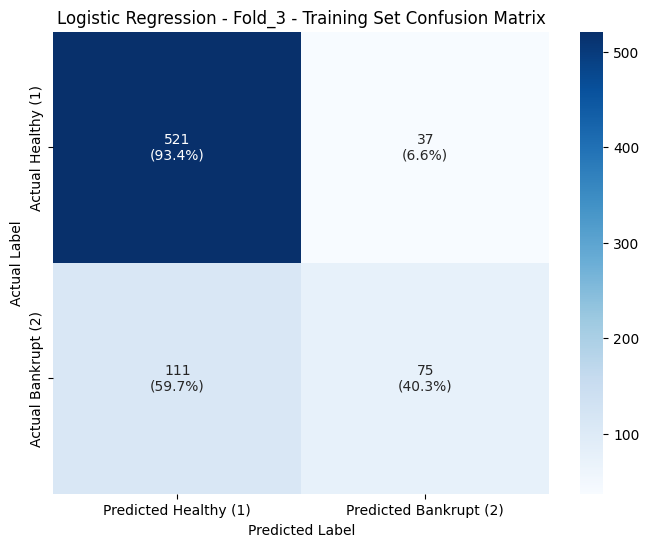

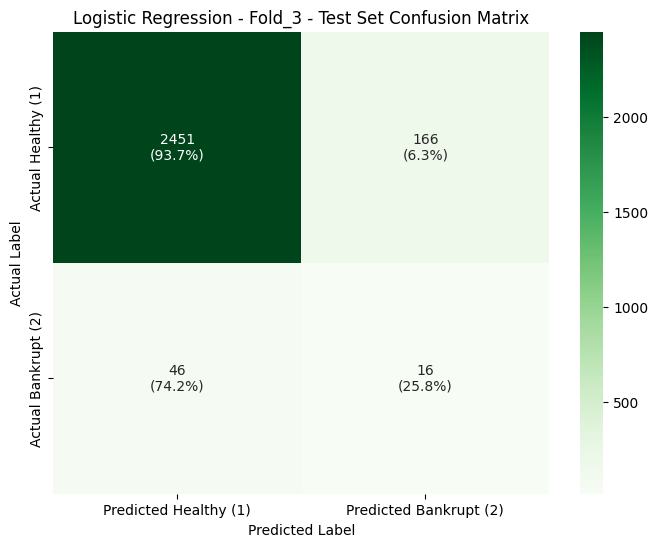

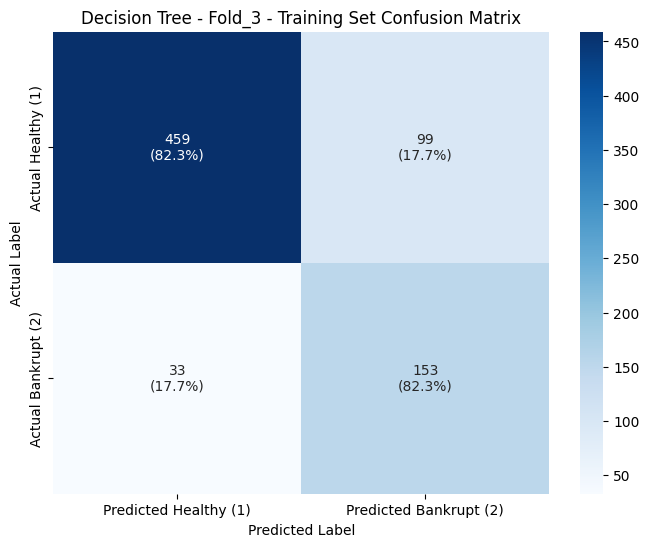

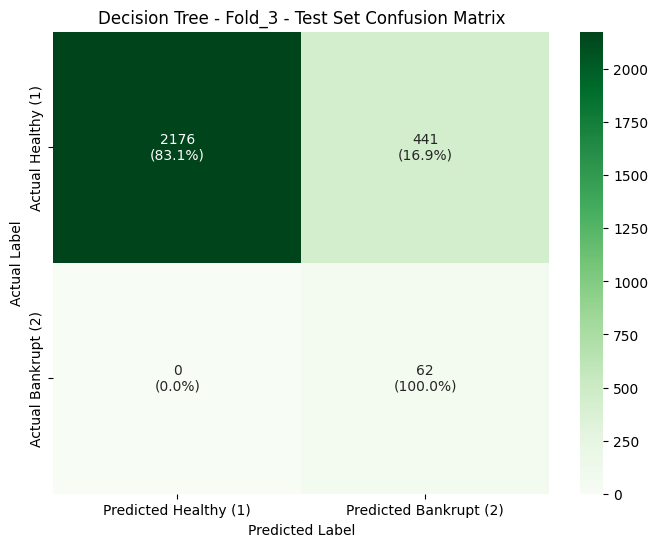

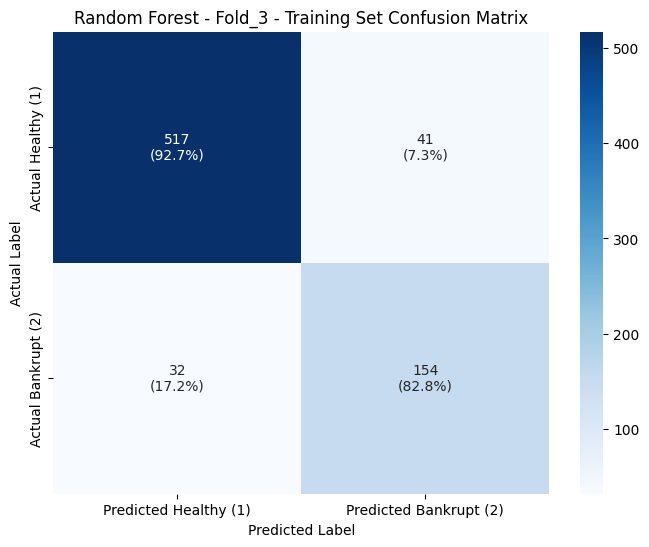

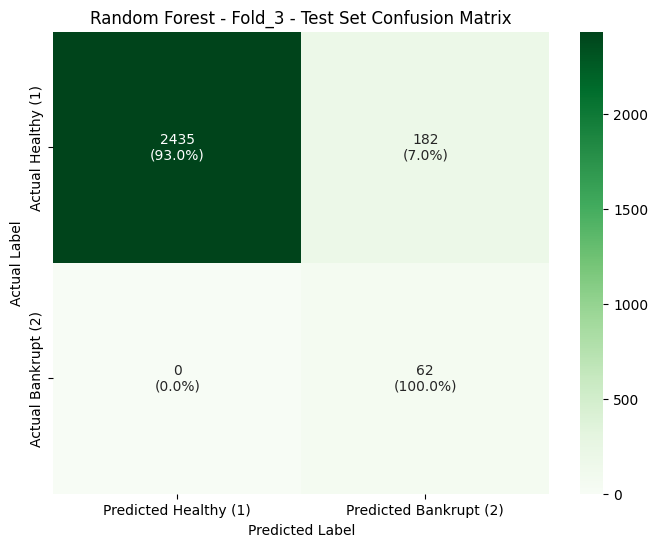

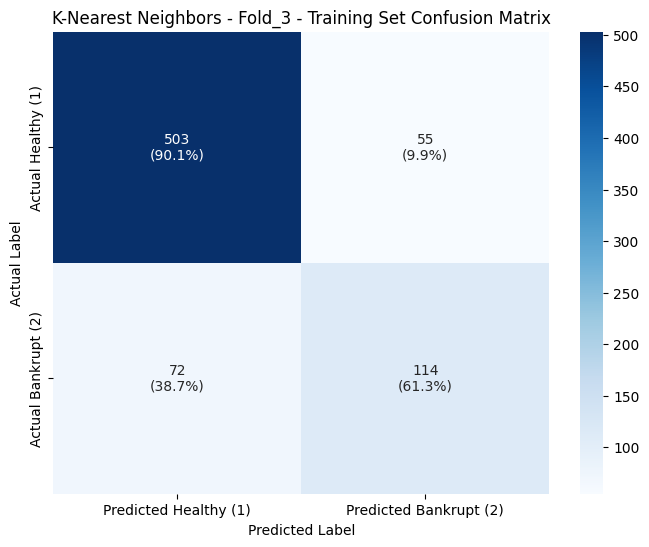

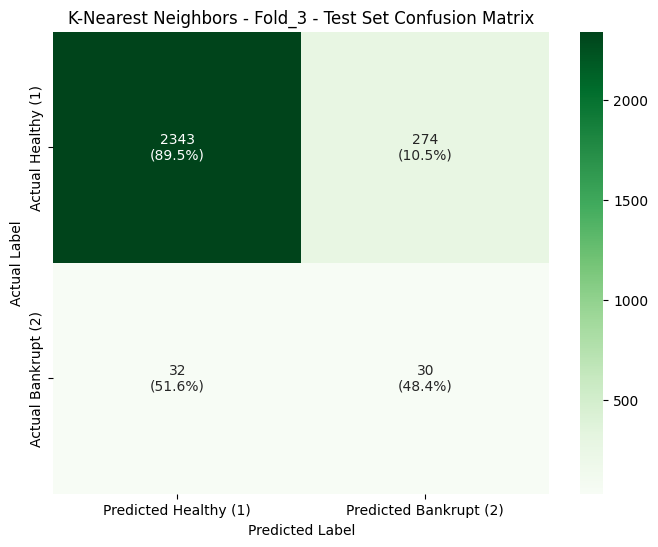

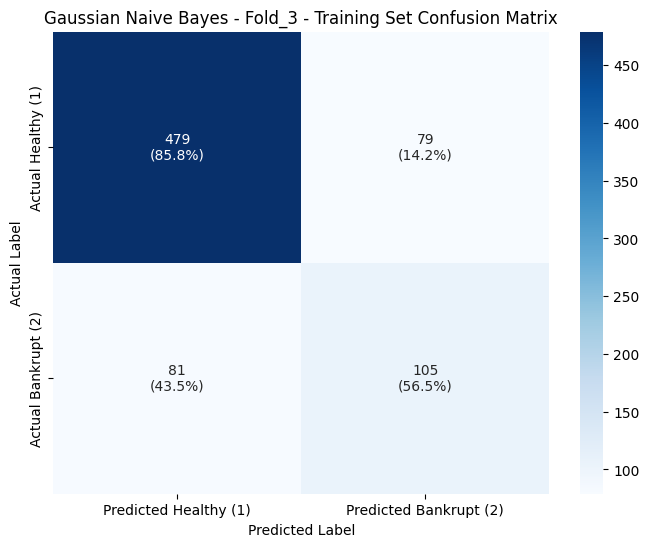

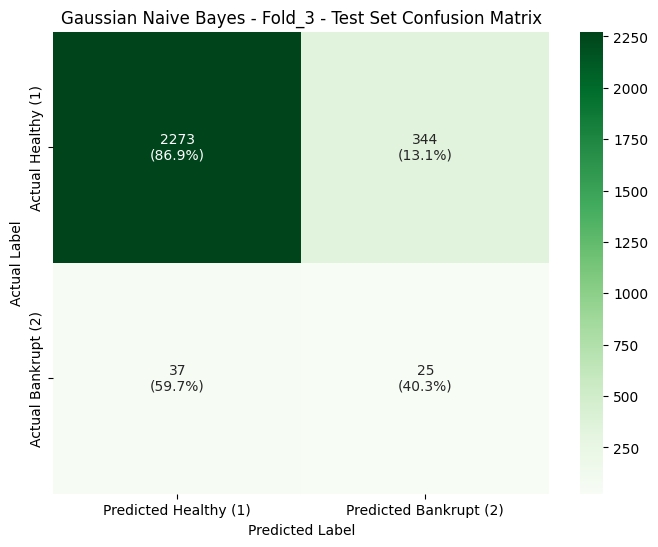

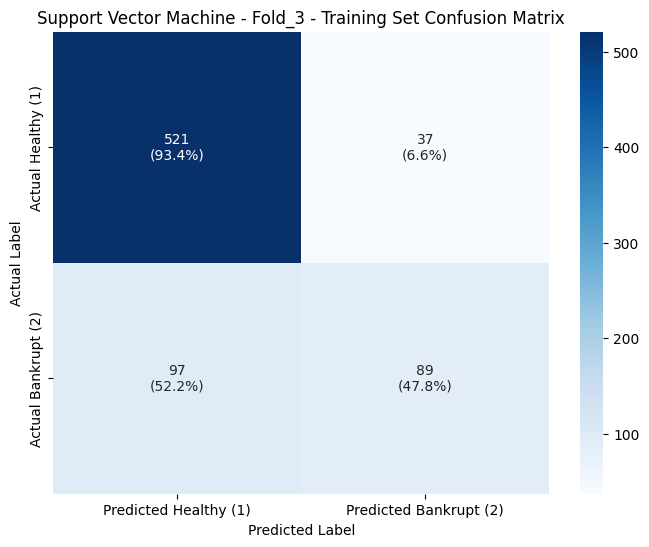

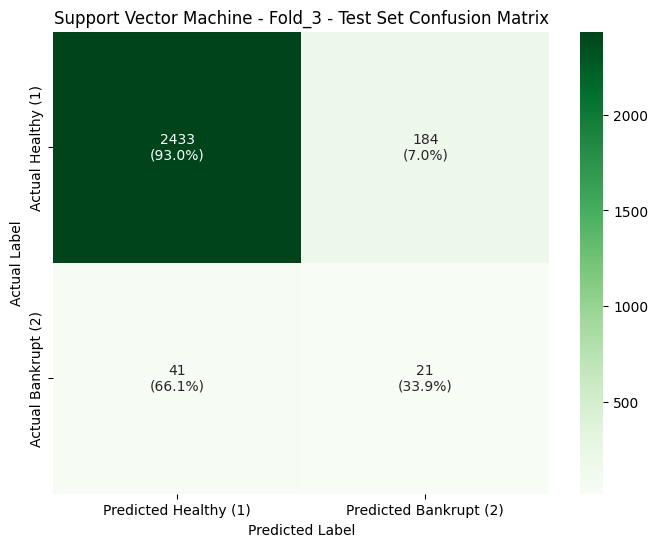

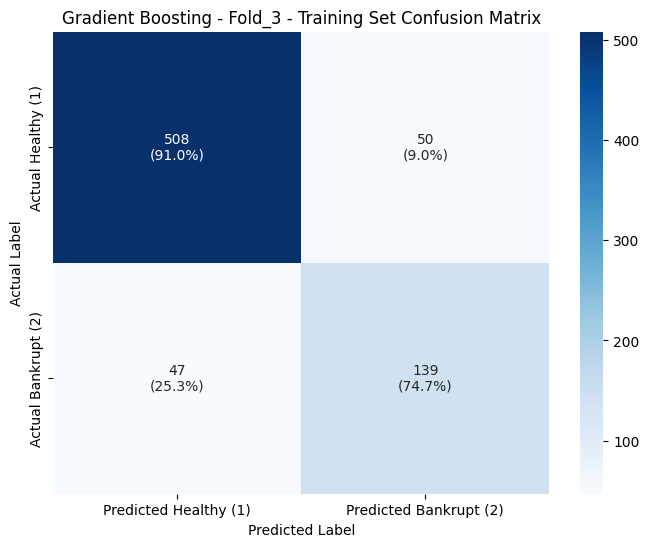

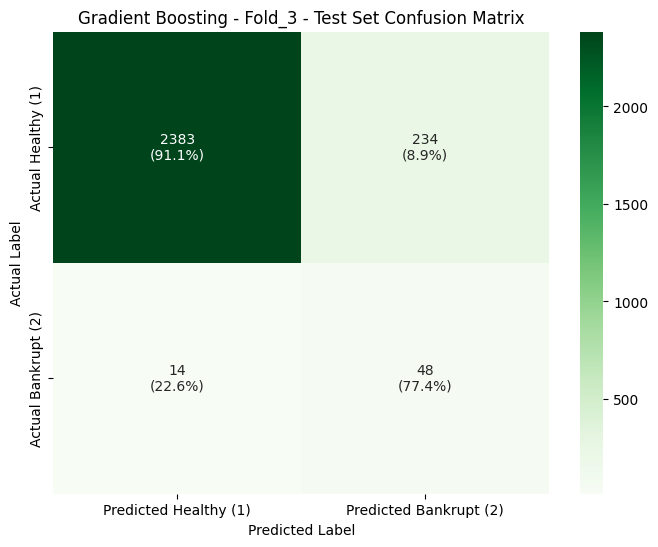


--- Confusion Matrices for Fold_4 ---


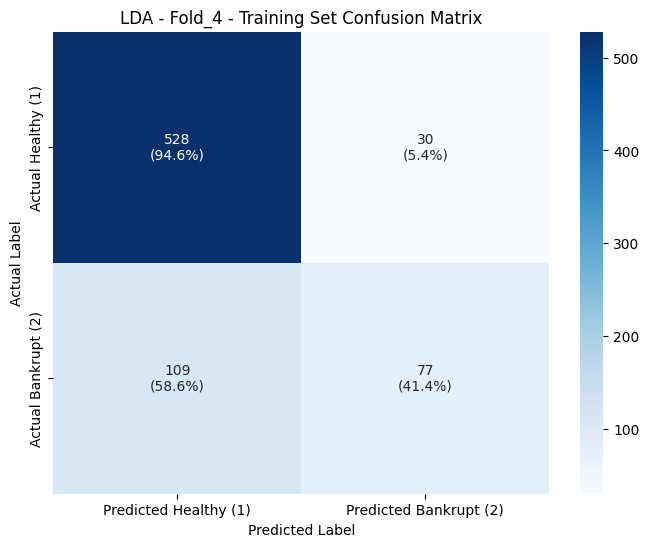

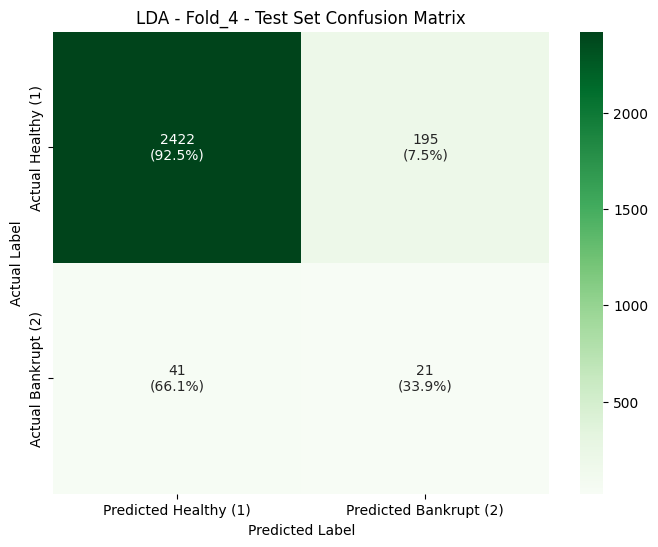

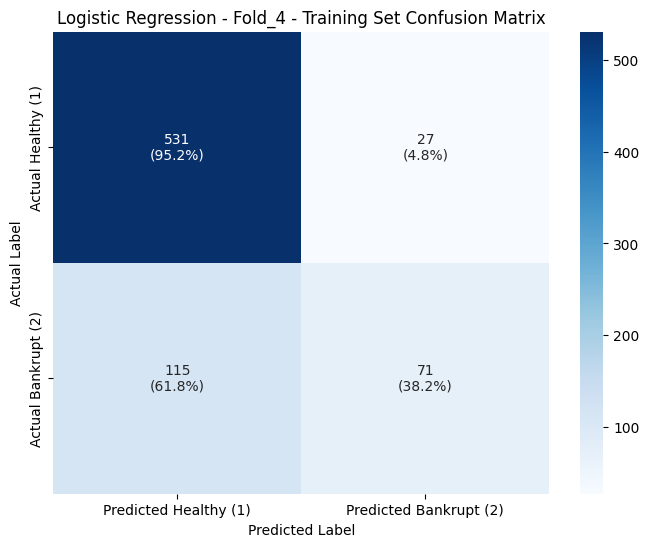

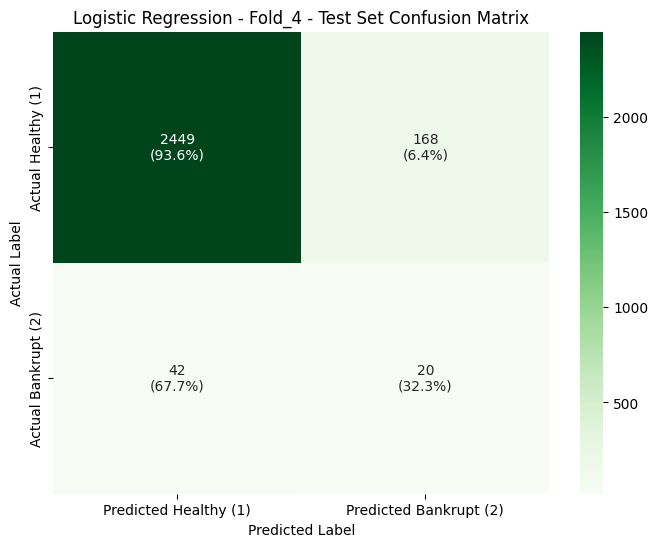

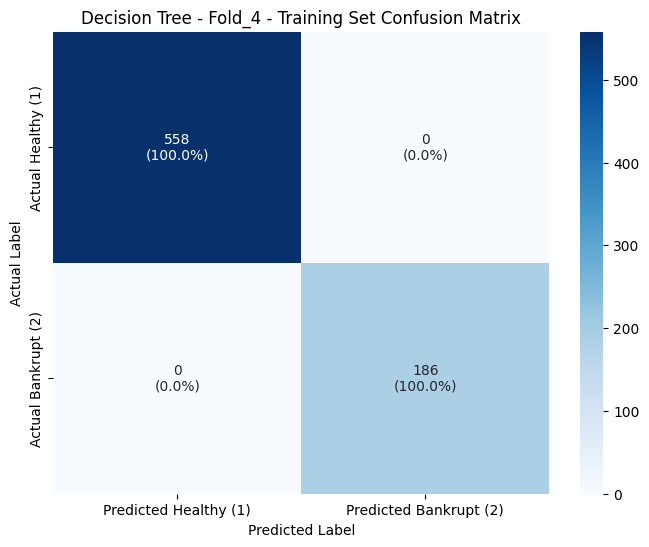

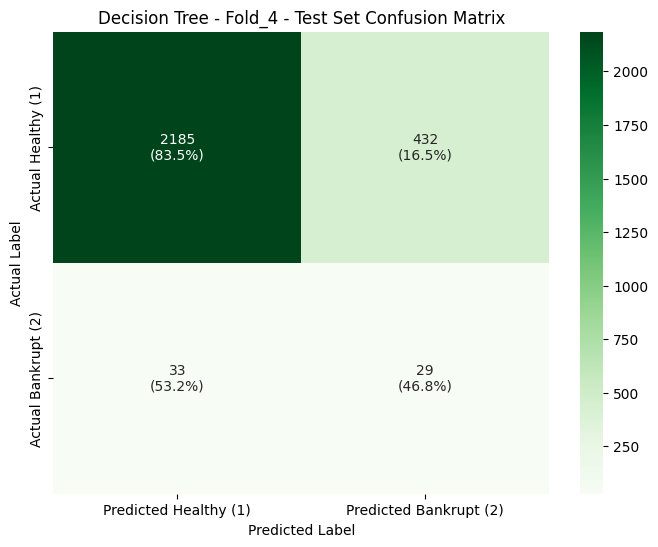

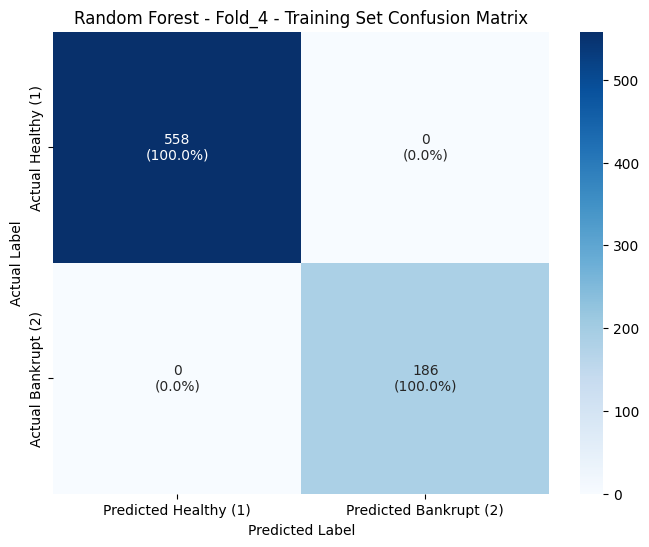

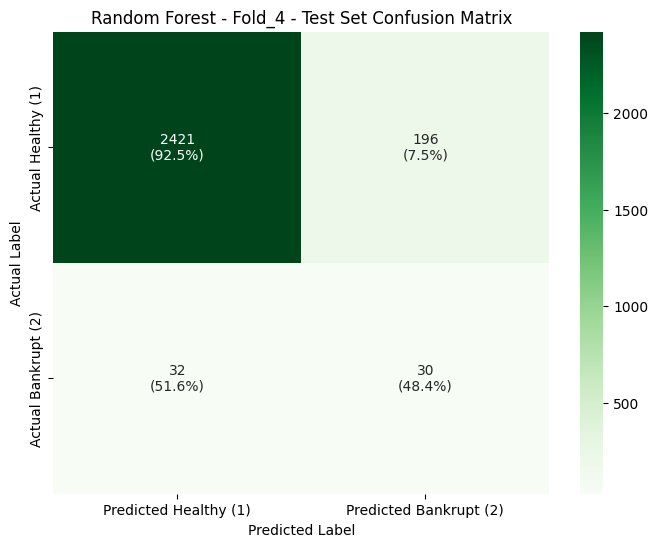

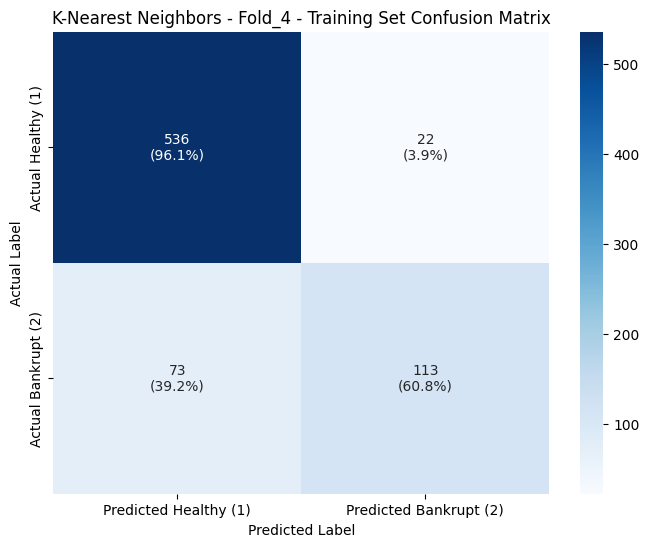

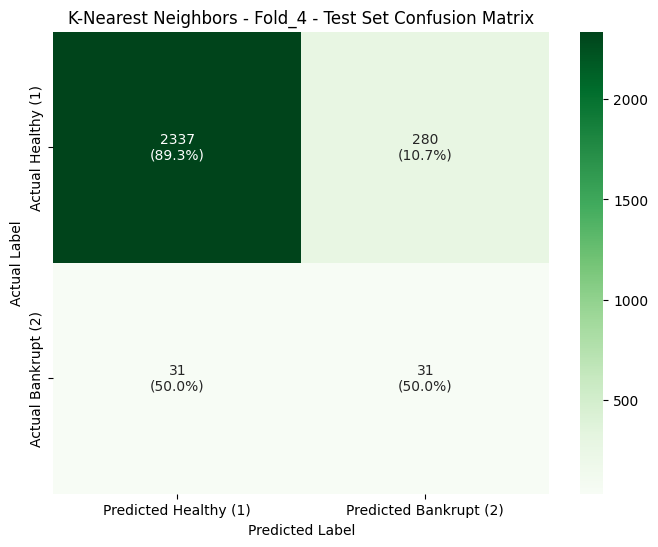

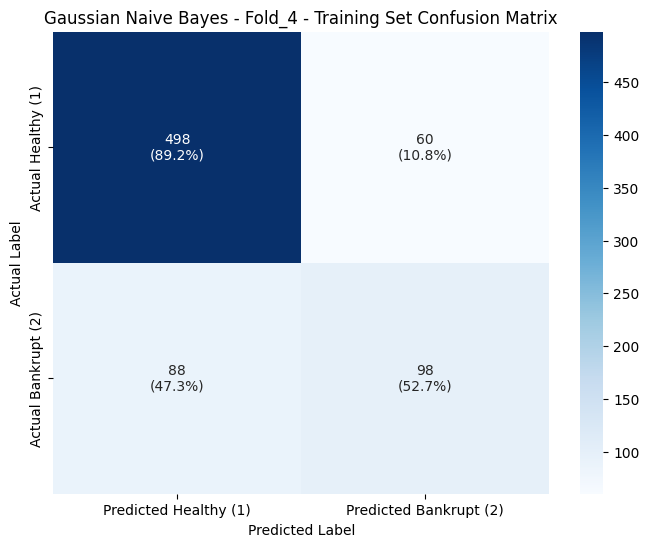

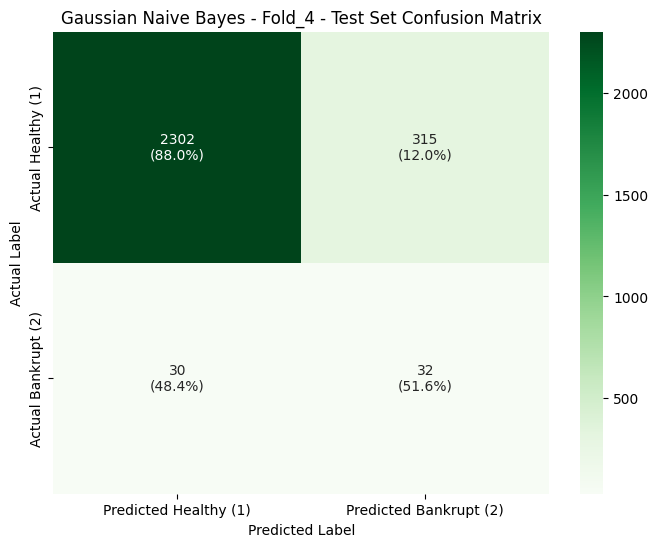

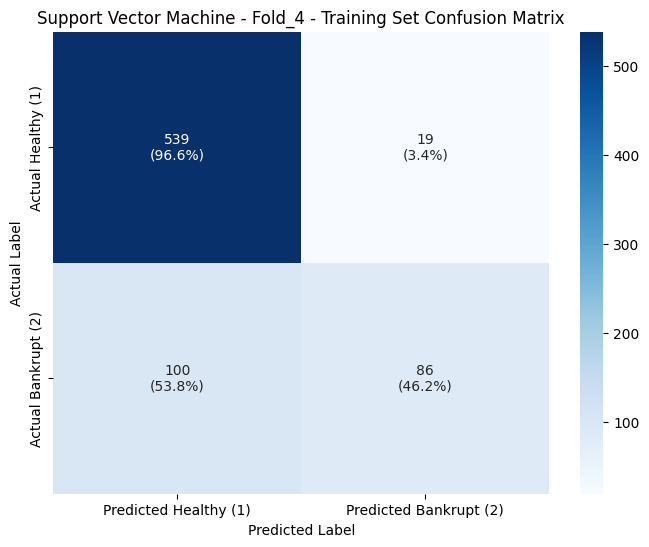

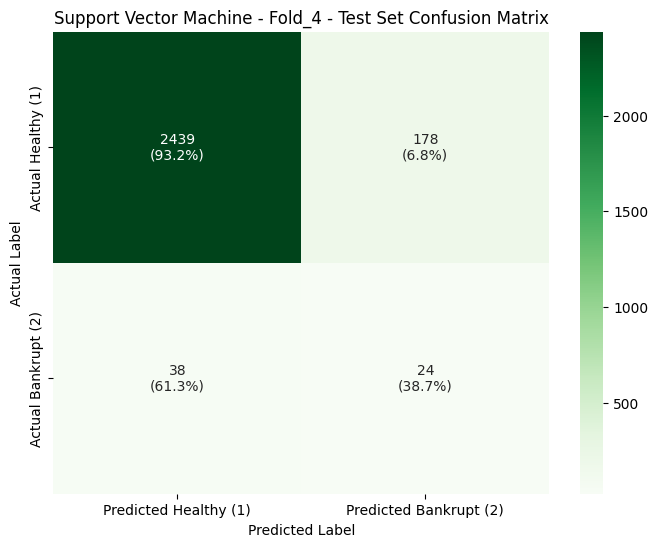

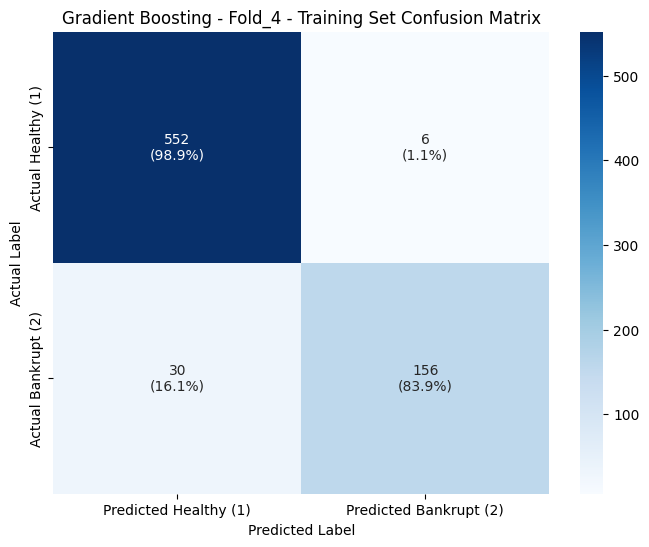

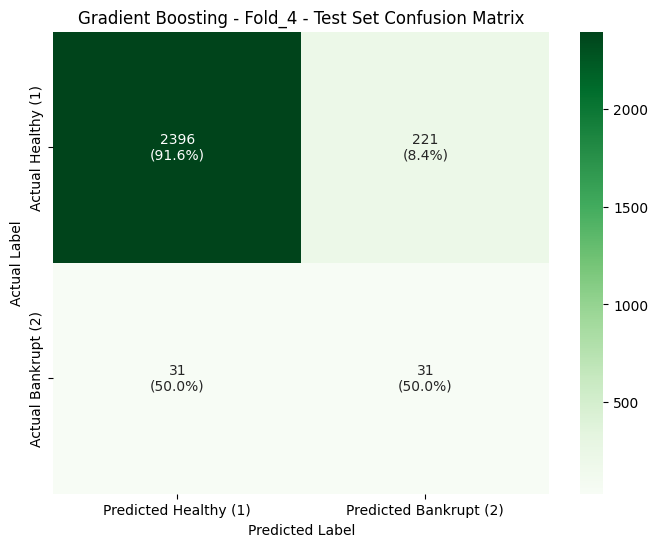


Confusion Matrix generation complete for all models and folds.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

print("Generating Confusion Matrices for all trained models across all folds...")

for fold_num_str, fold_trained_models in trained_models_per_fold.items():
    # Extract fold number from string (e.g., 'Fold_1' -> 1)
    fold_idx = int(fold_num_str.split('_')[1]) - 1

    # Get the data for the current fold from balanced_folds list
    fold_data = balanced_folds[fold_idx]
    X_train_balanced = fold_data['X_train']
    y_train_balanced = fold_data['y_train']
    X_test = fold_data['X_test']
    y_test = fold_data['y_test']

    print(f"\n--- Confusion Matrices for {fold_num_str} ---")

    for model_name, model in fold_trained_models.items():
        # --- Training Set Confusion Matrix ---
        y_pred_train = model.predict(X_train_balanced)
        cm_train = confusion_matrix(y_train_balanced, y_pred_train)

        # Calculate percentages for training set
        cm_train_percent = cm_train.astype('float') / cm_train.sum(axis=1)[:, np.newaxis]
        labels_train = (np.asarray([f'{count}\n({perc:.1%})' for count, perc in zip(cm_train.flatten(), cm_train_percent.flatten())])).reshape(2, 2)

        plt.figure(figsize=(8, 6)) # Increased figure size for better readability
        sns.heatmap(cm_train, annot=labels_train, fmt='', cmap='Blues',
                    xticklabels=['Predicted Healthy (1)', 'Predicted Bankrupt (2)'],
                    yticklabels=['Actual Healthy (1)', 'Actual Bankrupt (2)'],
                    cbar=True, annot_kws={"size": 10})
        plt.title(f'{model_name} - {fold_num_str} - Training Set Confusion Matrix')
        plt.ylabel('Actual Label')
        plt.xlabel('Predicted Label')
        plt.show()

        # --- Test Set Confusion Matrix ---
        y_pred_test = model.predict(X_test)
        cm_test = confusion_matrix(y_test, y_pred_test)

        # Calculate percentages for test set
        cm_test_percent = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
        labels_test = (np.asarray([f'{count}\n({perc:.1%})' for count, perc in zip(cm_test.flatten(), cm_test_percent.flatten())])).reshape(2, 2)

        plt.figure(figsize=(8, 6)) # Increased figure size for better readability
        sns.heatmap(cm_test, annot=labels_test, fmt='', cmap='Greens',
                    xticklabels=['Predicted Healthy (1)', 'Predicted Bankrupt (2)'],
                    yticklabels=['Actual Healthy (1)', 'Actual Bankrupt (2)'],
                    cbar=True, annot_kws={"size": 10})
        plt.title(f'{model_name} - {fold_num_str} - Test Set Confusion Matrix')
        plt.ylabel('Actual Label')
        plt.xlabel('Predicted Label')
        plt.show()

print("\nConfusion Matrix generation complete for all models and folds.")

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

performance_results = []

print("Calculating performance metrics for all models across all folds...")

for fold_num_str, fold_trained_models in trained_models_per_fold.items():
    # Extract fold index for data retrieval
    fold_idx = int(fold_num_str.split('_')[1]) - 1
    fold_data = balanced_folds[fold_idx]

    X_train_balanced = fold_data['X_train']
    y_train_balanced = fold_data['y_train']
    X_test = fold_data['X_test']
    y_test = fold_data['y_test']

    print(f"\n--- Evaluating models for {fold_num_str} ---")

    for model_name, model in fold_trained_models.items():
        # --- Predictions for Training Set ---
        y_pred_train = model.predict(X_train_balanced)

        # --- Predictions for Test Set ---
        y_pred_test = model.predict(X_test)

        # --- Probability predictions for AUC ROC ---
        # Check if predict_proba is available, otherwise use decision_function if SVC
        if hasattr(model, 'predict_proba'):
            y_proba_train = model.predict_proba(X_train_balanced)[:, 1] # Probability of class 1
            y_proba_test = model.predict_proba(X_test)[:, 1]
        elif hasattr(model, 'decision_function'):
            y_proba_train = model.decision_function(X_train_balanced) # Decision function for SVC
            y_proba_test = model.decision_function(X_test)
        else:
            y_proba_train = None # AUC ROC not applicable
            y_proba_test = None

        # Calculate metrics for Training Set
        accuracy_train = accuracy_score(y_train_balanced, y_pred_train)
        precision_train = precision_score(y_train_balanced, y_pred_train, average='weighted', zero_division=0)
        recall_train = recall_score(y_train_balanced, y_pred_train, average='weighted', zero_division=0)
        f1_train = f1_score(y_train_balanced, y_pred_train, average='weighted', zero_division=0)
        auc_roc_train = roc_auc_score(y_train_balanced, y_proba_train) if y_proba_train is not None else None

        # Calculate metrics for Test Set
        accuracy_test = accuracy_score(y_test, y_pred_test)
        precision_test = precision_score(y_test, y_pred_test, average='weighted', zero_division=0)
        recall_test = recall_score(y_test, y_pred_test, average='weighted', zero_division=0)
        f1_test = f1_score(y_test, y_pred_test, average='weighted', zero_division=0)
        auc_roc_test = roc_auc_score(y_test, y_proba_test) if y_proba_test is not None else None

        performance_results.append({
            'Fold': fold_num_str,
            'Model': model_name,
            'Set': 'Train',
            'Accuracy': accuracy_train,
            'Precision': precision_train,
            'Recall': recall_train,
            'F1-Score': f1_train,
            'AUC-ROC': auc_roc_train
        })
        performance_results.append({
            'Fold': fold_num_str,
            'Model': model_name,
            'Set': 'Test',
            'Accuracy': accuracy_test,
            'Precision': precision_test,
            'Recall': recall_test,
            'F1-Score': f1_test,
            'AUC-ROC': auc_roc_test
        })

# Convert results to a DataFrame for better readability
performance_df = pd.DataFrame(performance_results)

# Format numerical columns to 2 decimal places
metrics_cols = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']
for col in metrics_cols:
    if col in performance_df.columns:
        performance_df[col] = performance_df[col].round(2)

print("\nPerformance metric calculation complete.")
print("Displaying aggregated performance results (rounded to 2 decimal places):")
display(performance_df)


Calculating performance metrics for all models across all folds...

--- Evaluating models for Fold_1 ---

--- Evaluating models for Fold_2 ---

--- Evaluating models for Fold_3 ---

--- Evaluating models for Fold_4 ---

Performance metric calculation complete.
Displaying aggregated performance results (rounded to 2 decimal places):


,Fold,Model,Set,Accuracy,Precision,Recall,F1-Score,AUC-ROC
0,Fold_1,LDA,Train,0.80,0.79,0.80,0.78,0.87
1,Fold_1,LDA,Test,0.92,0.97,0.92,0.94,0.83
2,Fold_1,Logistic Regression,Train,0.80,0.78,0.80,0.77,0.86
3,Fold_1,Logistic Regression,Test,0.93,0.97,0.93,0.94,0.84
4,Fold_1,Decision Tree,Train,0.84,0.86,0.84,0.84,0.83
...,...,...,...,...,...,...,...,...
59,Fold_4,Gaussian Naive Bayes,Test,0.87,0.97,0.87,0.91,0.84
60,Fold_4,Support Vector Machine,Train,0.84,0.84,0.84,0.82,0.89
61,Fold_4,Support Vector Machine,Test,0.92,0.96,0.92,0.94,0.85
62,Fold_4,Gradient Boosting,Train,0.95,0.95,0.95,0.95,0.99


In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd

detailed_performance_records = []

print("Collecting detailed performance information...")

for fold_num_str, fold_trained_models in trained_models_per_fold.items():
    fold_idx = int(fold_num_str.split('_')[1]) - 1
    fold_data = balanced_folds[fold_idx]

    X_train_balanced = fold_data['X_train']
    y_train_balanced = fold_data['y_train']
    X_test = fold_data['X_test']
    y_test = fold_data['y_test']

    for model_name, model in fold_trained_models.items():
        # Get ROC-AUC from the already calculated performance_df
        auc_roc_train = performance_df[(performance_df['Fold'] == fold_num_str) & (performance_df['Model'] == model_name) & (performance_df['Set'] == 'Train')]['AUC-ROC'].iloc[0]
        auc_roc_test = performance_df[(performance_df['Fold'] == fold_num_str) & (performance_df['Model'] == model_name) & (performance_df['Set'] == 'Test')]['AUC-ROC'].iloc[0]

        # Training set metrics
        y_pred_train = model.predict(X_train_balanced)
        tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train_balanced, y_pred_train, labels=[1, 2]).ravel()

        detailed_performance_records.append({
            'Fold': fold_num_str,
            'Classifier Name': model_name,
            'Training or Test Set': 'Train',
            'Balanced or Unbalanced Train Set': 'Balanced',
            'Number of Training Samples': len(y_train_balanced),
            'Number of Non-Healthy Companies (Train)': len(y_train_balanced[y_train_balanced == 2]),
            'True Positives (TP)': tp_train,
            'True Negatives (TN)': tn_train,
            'False Positives (FP)': fp_train,
            'False Negatives (FN)': fn_train,
            'ROC-AUC': round(auc_roc_train, 2)
        })

        # Test set metrics
        y_pred_test = model.predict(X_test)
        tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_pred_test, labels=[1, 2]).ravel()

        detailed_performance_records.append({
            'Fold': fold_num_str,
            'Classifier Name': model_name,
            'Training or Test Set': 'Test',
            'Balanced or Unbalanced Train Set': 'Unbalanced',
            'Number of Training Samples': len(y_test), # Number of samples in the test set
            'Number of Non-Healthy Companies (Train)': len(y_test[y_test == 2]), # Number of non-healthy companies in the test set
            'True Positives (TP)': tp_test,
            'True Negatives (TN)': tn_test,
            'False Positives (FP)': fp_test,
            'False Negatives (FN)': fn_test,
            'ROC-AUC': round(auc_roc_test, 2)
        })

# Create the final DataFrame
detailed_performance_df = pd.DataFrame(detailed_performance_records)

print("\nDetailed performance DataFrame created and displayed:")
display(detailed_performance_df)


Detailed performance DataFrame created and displayed:


,Fold,Classifier Name,Training or Test Set,Balanced or Unbalanced Train Set,Number of Training Samples,Number of Non-Healthy Companies (Train),True Positives (TP),True Negatives (TN),False Positives (FP),False Negatives (FN),ROC-AUC
0,Fold_1,LDA,Train,Balanced,744,186,70,526,32,116,0.87
1,Fold_1,LDA,Test,Unbalanced,2679,62,28,2433,184,34,0.83
2,Fold_1,Logistic Regression,Train,Balanced,744,186,64,530,28,122,0.86
3,Fold_1,Logistic Regression,Test,Unbalanced,2679,62,27,2454,163,35,0.84
4,Fold_1,Decision Tree,Train,Balanced,744,186,153,471,87,33,0.83
...,...,...,...,...,...,...,...,...,...,...,...
59,Fold_4,Gaussian Naive Bayes,Test,Unbalanced,2679,62,32,2302,315,30,0.84
60,Fold_4,Support Vector Machine,Train,Balanced,744,186,86,539,19,100,0.89
61,Fold_4,Support Vector Machine,Test,Unbalanced,2679,62,24,2439,178,38,0.85
62,Fold_4,Gradient Boosting,Train,Balanced,744,186,156,552,6,30,0.99


In [ ]:
# Save the detailed_performance_df DataFrame to a CSV file
detailed_performance_df.to_csv('balancedDataOutcomes.csv', index=False)

print("Performance results saved to 'balancedDataOutcomes.csv' successfully.")

Performance results saved to 'balancedDataOutcomes.csv' successfully.
